# 1. Import Library

In [1]:
#!pip install textract
#!pip install spacy
#!pip install wordcloud
#!pip install pdfplumber
#!pip install PyPDF2
#!pip install pdftotext
#!pip install nltk
#!pip install transformers
#!pip install pdf2docx
#!pip install xgboost

In [2]:
# Importing the libraries

#For File Handeling
import os
import textract
import glob
import win32com.client

# For Text Preprocessing
import re
import string
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

# For Data Manipulation and Analysis
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt
from pylab import *

#For Document Conversion
from pdf2docx import Converter 
import docx2txt

# For Machine Learning (Model Building)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# For Serialization
import pickle

# To Handle Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Listing files and directories in the 'Resumes' folder
os.listdir('Resumes\\')

['Internship_Ravali_Musquare Technologies (1).docx',
 'Internship_Susovan Bag_Musquare Technologies.docx',
 'Peoplesoft resumes',
 'React Developer_Deepakreddy.docx',
 'React Developer_Haripriya.docx',
 'React Developer_Kamalakar Reddy.docx',
 'React Developer_Naveen sadhu.docx',
 'React Developer_PavasGoswami.doc',
 'React Developer_Pragnya.docx',
 'React Developer_Sarala Madasu-converted.docx',
 'React Developer_Thirupathiamma.docx',
 'React Developer_Vinay Reddy.doc',
 'React Dev_Krishna Kanth.docx',
 'React Dev_Krishna Kanth_Musquare Technologies.docx',
 'React JS Developer_AnjaniPriyadarshini.doc',
 'React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx',
 'React JS Developer_Venkatalakshmi (1)-converted.docx',
 'Reactjs Developer_kambala sai surendra_Musquare Technologies.docx',
 'Reactjs Developer_M Lokesh Babu_Musquare Technologies.docx',
 'Reactjs Developer_M Lokesh.docx',
 'Reactjs Developer_MD Khizaruddin Rauf _Musquare Technologies.docx',
 'Reactjs Developer_Prabakar

# 1. Converting .doc and .pdf files to .docx files

In [4]:
#  Converting .doc files to .docx files in specified directories using Microsoft Word automation
doc_directories = [
    'C:/Users/user/Desktop/Github RAP/Resumes/workday resumes',
    'C:/Users/user/Desktop/Github RAP/Resumes/SQL Developer Lightning insight',
    'C:/Users/user/Desktop/Github RAP/Resumes/Peoplesoft resumes',
    'C:/Users/user/Desktop/Github RAP/Resumes/'
]

word = win32com.client.Dispatch("Word.Application")

for doc_directory in doc_directories:
    # Get a list of all .doc files in the directory
    doc_files = glob.glob(os.path.join(doc_directory, "*.doc"))

    for i, doc in enumerate(doc_files):
        in_file = os.path.abspath(doc)
        wb = word.Documents.Open(in_file)
        out_file = re.sub(r'\.\w+$', '.docx', in_file)
        wb.SaveAs2(out_file, FileFormat=16)  # file format for docx
        wb.Close()

word.Quit()

In [5]:
# Converting PDF files to .docx files in specified directories using a PDF conversion library
pdf_directories = [
    'C:/Users/user/Desktop/Github RAP/Resumes/workday resumes',
    'C:/Users/user/Desktop/Github RAP/Resumes/SQL Developer Lightning insight',
    'C:/Users/user/Desktop/Github RAP/Resumes/Peoplesoft resumes',
    'C:/Users/user/Desktop/Github RAP/Resumes/'
]

# Loop through each directory
for pdf_directory in pdf_directories:
    # Get a list of all PDF files in the directory
    pdf_files = [os.path.join(pdf_directory, filename) for filename in os.listdir(pdf_directory) if filename.endswith('.pdf')]

    # Loop through each PDF file in the current directory and convert it to DOCX
    for pdf_file in pdf_files:
        # Generate the output DOCX file path by changing the extension
        docx_file = pdf_file.replace('.pdf', '.docx')

        # Convert the PDF to DOCX
        cv = Converter(pdf_file)
        cv.convert(docx_file, start=0, end=None)
        cv.close()

        print(f'Converted: {pdf_file} -> {docx_file}')

[INFO] Start to convert C:/Users/user/Desktop/Github RAP/Resumes/Reactjs Developer_Prabakaran_Musquare Technologies.pdf
[INFO] [1/4] Opening document...
[INFO] [2/4] Analyzing document...
[INFO] [3/4] Parsing pages...
[INFO] (1/2) Page 1
[INFO] (2/2) Page 2
[INFO] [4/4] Creating pages...
[INFO] (1/2) Page 1
[INFO] (2/2) Page 2
[INFO] Terminated in 1.88s.


Converted: C:/Users/user/Desktop/Github RAP/Resumes/Reactjs Developer_Prabakaran_Musquare Technologies.pdf -> C:/Users/user/Desktop/Github RAP/Resumes/Reactjs Developer_Prabakaran_Musquare Technologies.docx


# 2. Exctract the Text from Dataset

In [6]:
# Extracting text content from .docx files in the 'Peoplesoft resumes' directory and categorizing it as 'Peoplesoft'
file_path1 = []
category1  = []
directory1 = 'Resumes\\Peoplesoft resumes\\'
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('Peoplesoft')

In [7]:
# Creating a DataFrame with extracted text data and their associated category ('Peoplesoft')
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category'] = category1
data1

Raw_Details    Category
0   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  Peoplesoft
1   G. Ananda Rayudu \n\n\t\t       https://www.li...  Peoplesoft
2   PeopleSoft Database Administrator\n\n         ...  Peoplesoft
3   Classification: Internal\n\nClassification: In...  Peoplesoft
4   Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...  Peoplesoft
5   SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...  Peoplesoft
6   PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS.K...  Peoplesoft
7   PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...  Peoplesoft
8   Vinod Akkala                                  ...  Peoplesoft
9   PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...  Peoplesoft
10  PeopleSoft Administration\n\n \n\nVivekanand S...  Peoplesoft
11  Arun Venu\n\n\n\n\t  EXPERIENCE SUMMARY\t\n\n\...  Peoplesoft
12  Personal Details\t\t\n\n\n\nName\n\nPritam Bis...  Peoplesoft
13  Rahul Ahuja\n\n-------------------------------...  Peoplesoft
14  Hari Narayana \t\t              \n\n\t\n\n\n\n...  Peoplesoft
15  Murali\t\t       \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...  Peoplesoft
16  Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...  Peoplesoft
17  R Ahmed                                       ...  Peoplesoft
18  Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...  Peoplesoft
19  C O N T A C T :\n\n\n\nAddress: Manyata Tech P...  Peoplesoft

In [8]:
# Extracting text content from .docx files in the 'Resumes\' directory and categorizing it as 'React JS Developer
file_path2 = []
category2  = []
directory2 = 'Resumes\\'
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React JS Developer')

In [9]:
# Creating a DataFrame with extracted text data and their associated category ('React JS Developer')
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category'] = category2
data2

Raw_Details            Category
0   Name: Ravali P \n\n\n\n                       ...  React JS Developer
1   SUSOVAN  BAG   \n\nSeeking  a  challenging  po...  React JS Developer
2   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...  React JS Developer
3   HARIPRIYA BATTINA \n\nExperience as UI Develop...  React JS Developer
4   KAMALAKAR REDDY. A \n\nLinked In: https://www....  React JS Developer
5   Naveen Sadhu\n\n\n\n\n\nTitle: software develo...  React JS Developer
6   FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...  React JS Developer
7   PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...  React JS Developer
8   SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...  React JS Developer
9   Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...  React JS Developer
10  Maryala Vinay Reddy\n\n\n\n\tProfessional Summ...  React JS Developer
11  Ui-Developer/ React JS Developer \n\nNAME: KRI...  React JS Developer
12  Ui-Developer/ React JS Developer \n\nNAME: KRI...  React JS Developer
13  CURRICULUM VITAE\n\n\n\n\n\n\n\nAnjani Priyada...  React JS Developer
14  Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...  React JS Developer
15  Venkatalakshmi Pedireddy\n\nSoftware Developer...  React JS Developer
16  KAMBALA SAI SURENDRA   \n\n \n\n \n\n \n\n\n\n...  React JS Developer
17  MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  React JS Developer
18  MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...  React JS Developer
19  MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...  React JS Developer
20  Name: M. Prabakaran \nTitle: UI Developer\n\nP...  React JS Developer
21  Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...  React JS Developer
22  Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...  React JS Developer
23  SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer

In [10]:
# Extracting text content from .docx files in the 'Resumes/SQL Developer Lightning insight/' directory and categorizing it as 'SQL Developer'
file_path3 = []
category3  = []
directory3 = 'Resumes/SQL Developer Lightning insight/'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [11]:
# Creating a DataFrame with extracted text data and their associated category ('SQL Developer')
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category'] = category3
data3

Raw_Details       Category
0   ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Devel...  SQL Developer
1   Aradhana Tripathi\n\n\n\nCurrent Location: Gac...  SQL Developer
2   BUDDHA VAMSI                                  ...  SQL Developer
3   KAMBALLA PRADEEP                              ...  SQL Developer
4    Hyderabad\n\n\nNazeer Basha\n\nSQL and Power...  SQL Developer
5   Resume\n\nName     :  Neeraj Mishra\n\n\n\nExp...  SQL Developer
6   SQL DEVELOPER\n\nName: -   Bandi prem sai\n\n\...  SQL Developer
7   SQL SERVER DEVELOPER\n\n\n\n\n\nPriyanka L    ...  SQL Developer
8   SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...  SQL Developer
9   RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...  SQL Developer
10  resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...  SQL Developer
11  Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...  SQL Developer
12  Tatikonda Kiran Kumar.\n\n\n\n\n\n\n\n\t\tCare...  SQL Developer
13  SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...  SQL Developer

In [12]:
# Extracting text content from .docx files in the 'Resumes/workday resumes/' directory and categorizing it as 'workday'
file_path4 = []
category4  = []
directory4 = 'Resumes/workday resumes/'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('workday')

In [13]:
# Creating a DataFrame with extracted text data and their associated category ('workday')
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category'] = category4
data4

Raw_Details Category
0   Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...  workday
1   Name         : Gopi Krishna Reddy\n\n\t\t     ...  workday
2   Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...  workday
3   Harikrishna Akula                             ...  workday
4   HIMA.MENDU\n\n\t  \n\n\n\nCareer Objective\n\n...  workday
5   G Himaja\n\n                                  ...  workday
6   Name:\tJ. Sumanth Royal.\n\n\t\n\nPROFESSIONAL...  workday
7   JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...  workday
8   Madeeswar A\n\n\t\n\n\t\t\n\n\t\t\tPROFILE SUM...  workday
9   Mooraboyina Guravaiah\n\nWorkday Integration S...  workday
10  Name\t: Naresh Babu Cherukuri\n\n\n\nObjective...  workday
11  VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...  workday
12  Punugoti Swetha\n\nWorkday Technical Consultan...  workday
13  Workday HCM  Techno functional Consultant     ...  workday
14  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...  workday
15  Shireesh Balasani                             ...  workday
16  Workday Integration Consultant\n\n\n\nName    ...  workday
17  Srikanth (WORKDAY hCM Consultant)\t           ...  workday
18  WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...  workday
19  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...  workday
20  Vinay kumar .v\nWorkday Functional Consultant\...  workday

# 3. Create a DataFrame

In [14]:
# Combining all 4 DataFrames containing resume data into one DataFrame called 'resume_data'
resume_data = data1.append([data2, data3, data4], ignore_index = True)
resume_data

Raw_Details    Category
0   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  Peoplesoft
1   G. Ananda Rayudu \n\n\t\t       https://www.li...  Peoplesoft
2   PeopleSoft Database Administrator\n\n         ...  Peoplesoft
3   Classification: Internal\n\nClassification: In...  Peoplesoft
4   Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...  Peoplesoft
..                                                ...         ...
74  Workday Integration Consultant\n\n\n\nName    ...     workday
75  Srikanth (WORKDAY hCM Consultant)\t           ...     workday
76  WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...     workday
77  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...     workday
78  Vinay kumar .v\nWorkday Functional Consultant\...     workday

[79 rows x 2 columns]

In [15]:
#Showing summary information about the 'resume_data' DataFrame, such as column data types and memory usage
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  79 non-null     object
 1   Category     79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


# 3.2 Final Dataset

In [16]:
#Reordering the columns in the 'resume_data' DataFrame to have 'Category' followed by 'Raw_Details'
resume_data = resume_data[['Category','Raw_Details']]
resume_data

Category                                        Raw_Details
0   Peoplesoft  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1   Peoplesoft  G. Ananda Rayudu \n\n\t\t       https://www.li...
2   Peoplesoft  PeopleSoft Database Administrator\n\n         ...
3   Peoplesoft  Classification: Internal\n\nClassification: In...
4   Peoplesoft  Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...
..         ...                                                ...
74     workday  Workday Integration Consultant\n\n\n\nName    ...
75     workday  Srikanth (WORKDAY hCM Consultant)\t           ...
76     workday  WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
77     workday  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...
78     workday  Vinay kumar .v\nWorkday Functional Consultant\...

[79 rows x 2 columns]

In [17]:
#Retrieving the "Raw_Details" content at the 4th row of the 'resume_data' DataFrame
resume_data["Raw_Details"][4]

'Priyanka Ramadoss\n\n\t61/46, MountPleasant, \n\n\tCoonoor\n\n\tThe Nilgiris- 643102                                                                                            \n\n\t\n\nCareer Objective\n\n\n\nTo excel as a software professional by working in a learning and challenging environment and utilize the skills and knowledge through diligence, dedication and ensure maximum contribution to the growth of the organization I work for.\n\n\t\n\nProfile Summary\n\n\n\nAn Adept IT professional with 4.11 years (September 2016 - present) of experience as Peoplesoft Admin with Accenture\n\n\t\n\nProfessional Summary\n\n\n\nPeopleSoft Administrator (September 2016-Present)\n\n\n\nExperience in PeopleSoft Administration for Finance application.\n\nProficient in creating and configuring PeopleSoft components like Web server, Application server and process schedulers.\n\nActive monitoring in Non production databases and applications.\n\nKnowledgeable on PeopleSoft migrations using applicat

# 3.3 Save new CSV File

In [18]:
#Saving the 'resume_data' DataFrame as a CSV file named 'Raw_Resume.csv' without including the index column
resume_data.to_csv('Raw_Resume.csv', index=False)

# 4. Data Understanding

In [19]:
#Reading data from the 'Raw_Resume.csv' file and creating a DataFrame named 'resume_data' to hold the loaded data
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

Category                                        Raw_Details
0   Peoplesoft  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1   Peoplesoft  G. Ananda Rayudu \n\n\t\t       https://www.li...
2   Peoplesoft  PeopleSoft Database Administrator\n\n         ...
3   Peoplesoft  Classification: Internal\n\nClassification: In...
4   Peoplesoft  Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...
..         ...                                                ...
74     workday  Workday Integration Consultant\n\n\n\nName    ...
75     workday  Srikanth (WORKDAY hCM Consultant)\t           ...
76     workday  WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
77     workday  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...
78     workday  Vinay kumar .v\nWorkday Functional Consultant\...

[79 rows x 2 columns]

In [20]:
#Filtering and displaying resumes categorized as 'workday' from the 'resume_data' DataFrame
resume_data[resume_data.Category == 'workday']

Category                                        Raw_Details
58  workday  Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
59  workday  Name         : Gopi Krishna Reddy\n\n\t\t     ...
60  workday  Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...
61  workday  Harikrishna Akula                             ...
62  workday  HIMA.MENDU\n\n\t  \n\n\n\nCareer Objective\n\n...
63  workday  G Himaja\n\n                                  ...
64  workday  Name:\tJ. Sumanth Royal.\n\n\t\n\nPROFESSIONAL...
65  workday  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...
66  workday  Madeeswar A\n\n\t\n\n\t\t\n\n\t\t\tPROFILE SUM...
67  workday  Mooraboyina Guravaiah\n\nWorkday Integration S...
68  workday  Name\t: Naresh Babu Cherukuri\n\n\n\nObjective...
69  workday  VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...
70  workday  Punugoti Swetha\n\nWorkday Technical Consultan...
71  workday  Workday HCM  Techno functional Consultant     ...
72  workday  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...
73  workday  Shireesh Balasani                             ...
74  workday  Workday Integration Consultant\n\n\n\nName    ...
75  workday  Srikanth (WORKDAY hCM Consultant)\t           ...
76  workday  WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
77  workday  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...
78  workday  Vinay kumar .v\nWorkday Functional Consultant\...

In [21]:
# Counting the number of missing values in each column of the 'resume_data' DataFrame
resume_data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

# 4.1 Number of Words in each Resume

In [22]:
#Adding a 'Word_Count' column to count the number of words in the 'Raw_Details' column 
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

Raw_Details  Word_Count
0  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...        1023
1  G. Ananda Rayudu \n\n\t\t       https://www.li...        1441
2  PeopleSoft Database Administrator\n\n         ...        1346
3  Classification: Internal\n\nClassification: In...         558
4  Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...         667

# 4.2 Number of Characters

In [23]:
#Adding a 'Char_Count' column to count the number of characters (including spaces) in the 'Raw_Details' column 
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

Raw_Details  Char_Count
0  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...        8010
1  G. Ananda Rayudu \n\n\t\t       https://www.li...        8318
2  PeopleSoft Database Administrator\n\n         ...        6900
3  Classification: Internal\n\nClassification: In...        4917
4  Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...        5196

# 4.3 Number of Stopwords

In [24]:
# Counting the stopwords in each resume and adding the count as a new 'Stopwords' column in the 'resume_data' DataFrame
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

Raw_Details  Stopwords
0  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...        190
1  G. Ananda Rayudu \n\n\t\t       https://www.li...        186
2  PeopleSoft Database Administrator\n\n         ...        177
3  Classification: Internal\n\nClassification: In...        114
4  Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...        123

In [25]:
#Counting the numeric characters in each resume and adds the count as a new 'Numerics' column in the 'resume_data' DataFrame
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

Raw_Details  Numerics
0  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...         4
1  G. Ananda Rayudu \n\n\t\t       https://www.li...         6
2  PeopleSoft Database Administrator\n\n         ...         4
3  Classification: Internal\n\nClassification: In...         7
4  Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...         7

In [26]:
# Seeing the data
resume_data

Category                                        Raw_Details  Word_Count  \
0   Peoplesoft  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...        1023   
1   Peoplesoft  G. Ananda Rayudu \n\n\t\t       https://www.li...        1441   
2   Peoplesoft  PeopleSoft Database Administrator\n\n         ...        1346   
3   Peoplesoft  Classification: Internal\n\nClassification: In...         558   
4   Peoplesoft  Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...         667   
..         ...                                                ...         ...   
74     workday  Workday Integration Consultant\n\n\n\nName    ...         904   
75     workday  Srikanth (WORKDAY hCM Consultant)\t           ...        1063   
76     workday  WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...        1076   
77     workday  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...        1031   
78     workday  Vinay kumar .v\nWorkday Functional Consultant\...         702   

    Char_Count  Stopwords  Numerics  
0         8010        190         4  
1         8318        186         6  
2         6900        177         4  
3         4917        114         7  
4         5196        123         7  
..         ...        ...       ...  
74        7030        197         3  
75        6737        194         9  
76        8329        236         6  
77        6836        193         7  
78        5126        150         2  

[79 rows x 6 columns]

# 5. Text Pre-Processing

# 5.1 Using Regular Expression

In [27]:
#This function preprocesses text data by converting it to lowercase, removing HTML tags, URLs, numbers, and stopwords, resulting in cleaned text
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [28]:
#Preprocessing the 'Raw_Details' column using the preprocess function, and storing the cleaned text in a new column called 'Resume_Details'
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

# 5.2 Clean Text from Resume

In [29]:
resume_data

Category                                        Raw_Details  \
0   Peoplesoft  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...   
1   Peoplesoft  G. Ananda Rayudu \n\n\t\t       https://www.li...   
2   Peoplesoft  PeopleSoft Database Administrator\n\n         ...   
3   Peoplesoft  Classification: Internal\n\nClassification: In...   
4   Peoplesoft  Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...   
..         ...                                                ...   
74     workday  Workday Integration Consultant\n\n\n\nName    ...   
75     workday  Srikanth (WORKDAY hCM Consultant)\t           ...   
76     workday  WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...   
77     workday  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...   
78     workday  Vinay kumar .v\nWorkday Functional Consultant\...   

                                       Resume_Details  
0   anubhav kumar singh core competencies scriptin...  
1   ananda rayudu profile summary years experience...  
2   peoplesoft database administrator gangareddy p...  
3   classification internal classification interna...  
4   priyanka ramadoss mountpleasant coonoor nilgir...  
..                                                ...  
74  workday integration consultant name sri krishn...  
75  srikanth workday hcm consultant seeking suitab...  
76  workday hcm fcm name kumar role workday consul...  
77  venkateswarlu workday consultant professional ...  
78  vinay kumar workday functional consultant expe...  

[79 rows x 3 columns]

# 5.3 Save the Clean Data in new CSV File

In [30]:
#Removing the 'Raw_Details' column from the 'resume_data' DataFrame
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

Category                                     Resume_Details
0   Peoplesoft  anubhav kumar singh core competencies scriptin...
1   Peoplesoft  ananda rayudu profile summary years experience...
2   Peoplesoft  peoplesoft database administrator gangareddy p...
3   Peoplesoft  classification internal classification interna...
4   Peoplesoft  priyanka ramadoss mountpleasant coonoor nilgir...
..         ...                                                ...
74     workday  workday integration consultant name sri krishn...
75     workday  srikanth workday hcm consultant seeking suitab...
76     workday  workday hcm fcm name kumar role workday consul...
77     workday  venkateswarlu workday consultant professional ...
78     workday  vinay kumar workday functional consultant expe...

[79 rows x 2 columns]

In [31]:
#Saving the cleaned resume data to a new CSV file named 'Cleaned_Resumes.csv' 
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [32]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

Category                                     Resume_Details
0   Peoplesoft  anubhav kumar singh core competencies scriptin...
1   Peoplesoft  ananda rayudu profile summary years experience...
2   Peoplesoft  peoplesoft database administrator gangareddy p...
3   Peoplesoft  classification internal classification interna...
4   Peoplesoft  priyanka ramadoss mountpleasant coonoor nilgir...
..         ...                                                ...
74     workday  workday integration consultant name sri krishn...
75     workday  srikanth workday hcm consultant seeking suitab...
76     workday  workday hcm fcm name kumar role workday consul...
77     workday  venkateswarlu workday consultant professional ...
78     workday  vinay kumar workday functional consultant expe...

[79 rows x 2 columns]

In [33]:
#Retrieving the "Resume_Details" content at the 5th row of the 'resume_data' DataFrame
resume_data.Resume_Details[5]

'sirazuddin bangalore india sirazuddin bangalore india profile summary overall years experience peoplesoft administrator installed peopletools scratch including products experience peopletools application hrms fscm deterministic approach towards problem solving troubleshooting proficient integration broker upgraded fscm hcm applications peopletools peopletools education graduated tech electronics communication engg college engineering vizianagaram jntuk aggregate achieved marks standard scored standard achievements awarded bravo pat back techahindra awarded associate month award innovator month time awarded spot pat back capgemini work experience capgemini may till production support finance environment respective non production environments project experience project name axa role consultant environment windows server cognizant technol ogy sol ions augus april voya financial insurance client project deals support managing finance applications project experience project name voya finan

# 6. Named Entity Recognition (NER)

In [34]:
#Preprocessing and analyzing the text data in the 'Resume_Details' column, identifying and printing the 50 most common words in the cleaned text
def preprocess(sentence):
    cleantext = re.sub(r'http\S+', '', sentence)
    rem_num = re.sub('[0-9]+', '', cleantext)
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    return filtered_words

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += ' '.join(cleanedText)
    requiredWords = nltk.word_tokenize(cleanedSentences)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('peoplesoft', 30244), ('experience', 25444), ('application', 25407), ('server', 21072), ('project', 14265), ('database', 14234), ('using', 13618), ('web', 12738), ('data', 12005), ('process', 11253), ('servers', 10865), ('tools', 9808), ('people', 9796), ('reports', 9724), ('sql', 9437), ('oracle', 9010), ('domains', 7851), ('knowledge', 7785), ('involved', 7764), ('scheduler', 7592), ('worked', 7583), ('environment', 7292), ('support', 7110), ('development', 7043), ('client', 6895), ('react', 6783), ('team', 6749), ('production', 6670), ('like', 6653), ('system', 6649), ('applications', 6412), ('windows', 6319), ('fscm', 6294), ('skills', 6257), ('creating', 6084), ('technical', 5961), ('integration', 5951), ('issues', 5950), ('various', 5914), ('developer', 5903), ('hcm', 5877), ('working', 5859), ('role', 5815), ('responsibilities', 5769), ('good', 5640), ('business', 5559), ('services', 5485), ('testing', 5405), ('management', 5334), ('change', 5091)]


# 7. Parts Of Speech (POS) Tagging

In [35]:
#Processing a portion of the cleaned text data for named entity recognition, and displaying a visualization of the named entities in that text block using spaCy's 'displacy' module
nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

# EDA

In [36]:
# insight about the dataset

In [37]:
#Collecting the filenames of .docx files and their respective folder names 
file_path = r'C:/Users/user/Desktop/Github RAP\Resumes'
docx_file = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith('.docx'):
                docx_file.append(file)
                folder_name.append(folder)

for file in os.listdir(file_path):
            if file.endswith('.docx'):
                docx_file.append(file)
                folder_name.append(folder)

In [38]:
#Printing the total count of .docx files collected in the 'docx_file' list
print('Total Number of Files  = {}'.format(len(docx_file)))

Total Number of Files  = 79


## Visualization

In [39]:
# Extrecting resumes by profile category

In [40]:
#Collecting .docx filenames and associating them with folder(Category) names 
file_path = r'Resumes/'
file_name = []
profile   = []
            
for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith('.docx'):
                profile.append(folder)
                file_name.append(file)

for file in os.listdir(file_path):
            if file.endswith('.docx'):
                profile.append('React JS Developer')
                file_name.append(file)

In [41]:
#Creating a DataFrame 'resume_data' with two columns: 'Profile' for profile names and 'Resumes' for .docx file names
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
# there are some profiles contains 'resumes' and 'Lightning insight' names ,so removing this names
resume_data['Profile'] = resume_data['Profile'].str.replace(' resumes', '').str.replace(' Lightning insight', '')
resume_data['Resumes'] = file_name
resume_data

Profile                                            Resumes
0           Peoplesoft                 Peoplesoft Admin_AnubhavSingh.docx
1           Peoplesoft              Peoplesoft Admin_G Ananda Rayudu.docx
2           Peoplesoft                   Peoplesoft Admin_Gangareddy.docx
3           Peoplesoft                       Peoplesoft Admin_Murali.docx
4           Peoplesoft            Peoplesoft Admin_Priyanka Ramadoss.docx
..                 ...                                                ...
74  React JS Developer  Reactjs Developer_MD Khizaruddin Rauf _Musquar...
75  React JS Developer  Reactjs Developer_Prabakaran_Musquare Technolo...
76  React JS Developer  Reactjs Developer_Pranish Sonone_Musquare Tech...
77  React JS Developer  Reactjs Developer_Ranga Gaganam_Musquare Techn...
78  React JS Developer  Reactjs Developer_Shaik Abdul Sharuk_Musquare ...

[79 rows x 2 columns]

In [42]:
#The unique profile values in the 'Profile' column of the 'resume_data' DataFrame
resume_data.Profile.value_counts().index

Index(['React JS Developer', 'workday', 'Peoplesoft', 'SQL Developer'], dtype='object')

In [43]:
#displaying the frequency of each unique profile in the 'Profile' column of the 'resume_data'
resume_data.Profile.value_counts()

React JS Developer    24
workday               21
Peoplesoft            20
SQL Developer         14
Name: Profile, dtype: int64

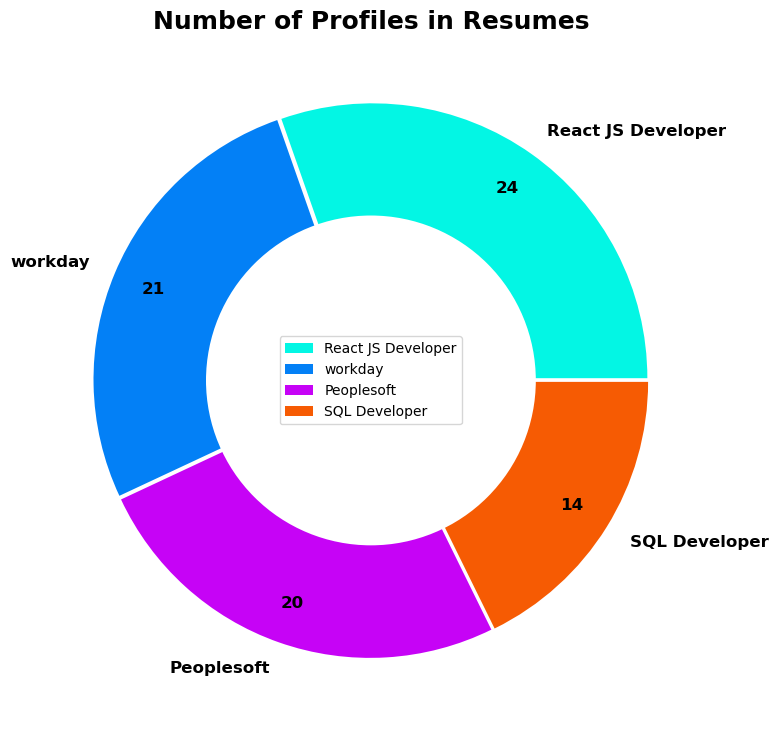

In [44]:
#creating a pie chart to visualize the distribution of profiles in the resume dataset, including labels and percentages
# Number of total Resumes
fig = plt.figure(figsize=(8,8))

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03'] #, '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110'
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig(r'C:/Users/user/Desktop/Github RAP/No_Resume_Pai', dpi = 500)

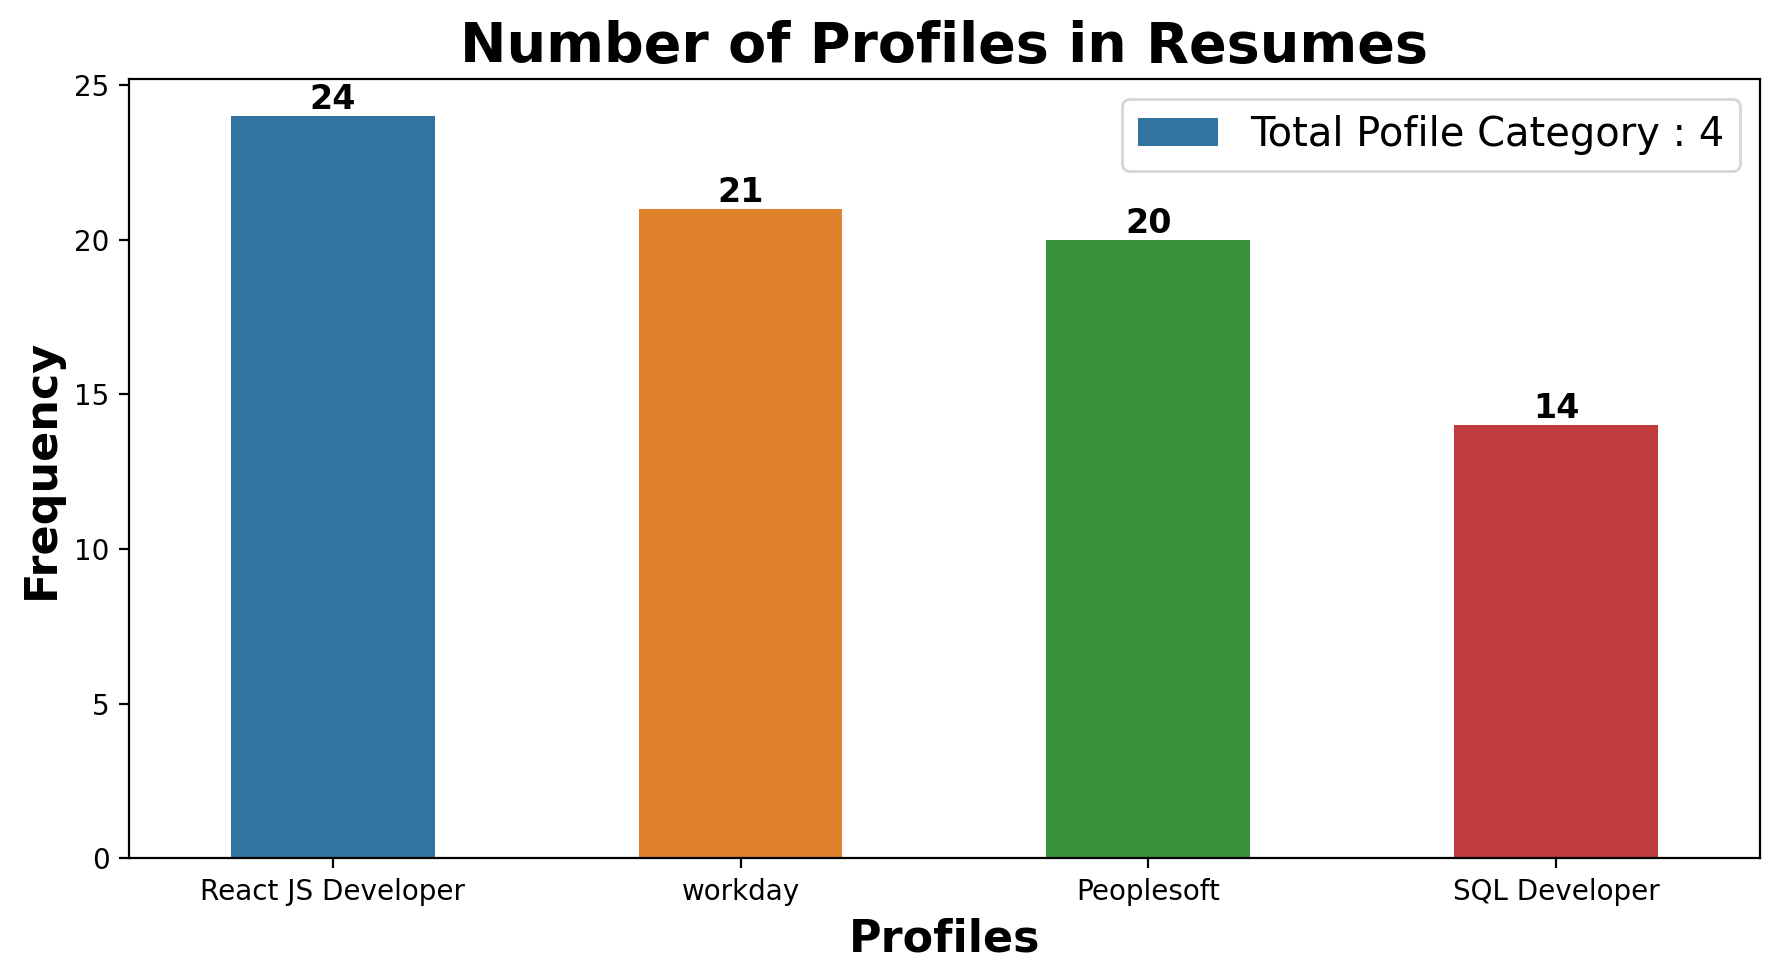

In [45]:
#creating a bar chart to visualize the distribution of profiles in the resume dataset, providing labels and frequencies
fig, axe = plt.subplots(1,1, figsize=(9,5), dpi=200)
ax = sns.barplot(x= resume_data.Profile.value_counts().index, y= resume_data.Profile.value_counts(), width=0.5,
                 data= resume_data, ax= axe, label= 'Total Pofile Category : {}'.format(len(resume_data.Profile.unique())))

axe.set_xlabel('Profiles', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Number of Profiles in Resumes', fontsize= 20, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig(r'C:/Users/user/Desktop/Github RAP/No_Resume_Bar', dpi = 500)

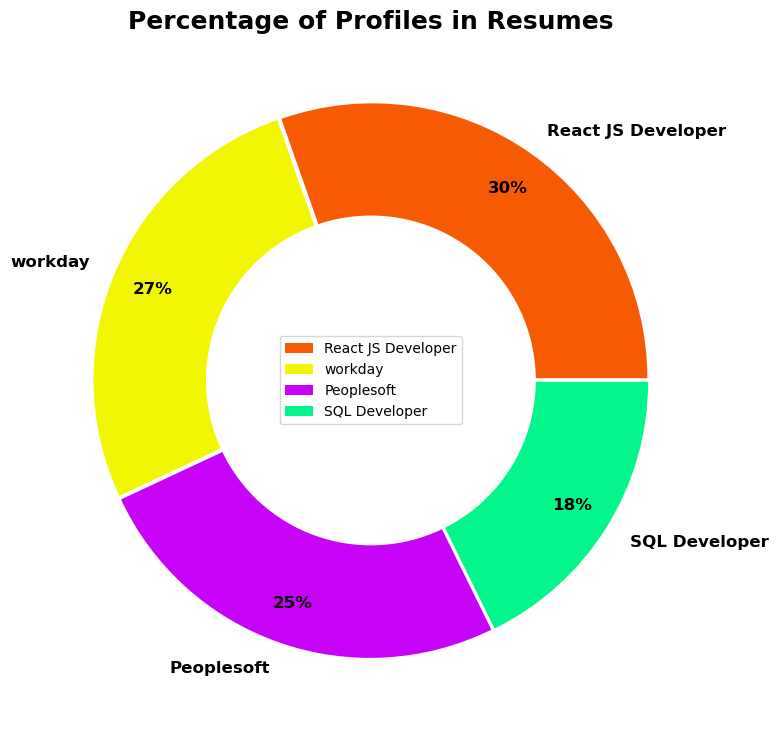

In [46]:
#creating a pie chart to visualize the percentage distribution of profiles in the resume dataset, including labels and percentages
# Percentage of profile Category
fig = plt.figure(figsize=(8,8),dpi=100) 

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#C603F6', '#03F68B']
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, explode= explode, 
        startangle= 0, textprops= {'size':'large', 'fontweight':'bold', 'color':'black'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig(r'C:/Users/user/Desktop/Github RAP/Per_Cat_Pai', dpi = 500)

In [47]:
# Now reading the resumes
#defining a function to extract text from .docx files using the docx2txt library
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None
 
print(extract_text_from_docx('Resumes\React Developer_Haripriya.docx'))

HARIPRIYA BATTINA 

Experience as UI Developer in Reactjs, JavaScript. 

Phone: +91 9908576950 

Gmail: haripriyabattini@gmai.com 

Location: Visakhapatnam 

JOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th

technological requirements. 

● Want to be a part of a reputed organization that allows me to effectively use my 

technical skills in the real world for overall growth of organization and my 

professional career. 

WORK EXPERIENCE EDUCATION 

1. Associate UI Developr 

Company: Blue Yonder, Hyderabad. 

● Work Done On “COPERNICUS” Project. 

● The Main Moto of this project is, it is GTM (Go To Market) Portal which is specially designed for demo teams to shower case Blue Yonder Products and Features for Customers and Partners 

● Technologies: HTML, CSS, React JS. 

● IDE: VS Code. 

● Methodologies: Agile. 

JOB RESPONSIBILITIES: 

● Involved Desi

In [48]:
# Data Exploration
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

Category                                     Resume_Details
0   Peoplesoft  anubhav kumar singh core competencies scriptin...
1   Peoplesoft  ananda rayudu profile summary years experience...
2   Peoplesoft  peoplesoft database administrator gangareddy p...
3   Peoplesoft  classification internal classification interna...
4   Peoplesoft  priyanka ramadoss mountpleasant coonoor nilgir...
..         ...                                                ...
74     workday  workday integration consultant name sri krishn...
75     workday  srikanth workday hcm consultant seeking suitab...
76     workday  workday hcm fcm name kumar role workday consul...
77     workday  venkateswarlu workday consultant professional ...
78     workday  vinay kumar workday functional consultant expe...

[79 rows x 2 columns]

In [49]:
# Now N-grams
# N-grams analyses are often used to see which words often show up together.

In [50]:
#extracting and displaying the first 20 unigrams (individual words) from the 'Resume_Details' text
TextBlob(resume_data['Resume_Details'][1]).ngrams(1)[:20]

[WordList(['ananda']),
 WordList(['rayudu']),
 WordList(['profile']),
 WordList(['summary']),
 WordList(['years']),
 WordList(['experience']),
 WordList(['implementing']),
 WordList(['upgrading']),
 WordList(['supporting']),
 WordList(['peoplesoft']),
 WordList(['database']),
 WordList(['administration']),
 WordList(['including']),
 WordList(['human']),
 WordList(['capital']),
 WordList(['management']),
 WordList(['hcm']),
 WordList(['financials']),
 WordList(['campus']),
 WordList(['solutions'])]

In [51]:
#extracting and displaying the first 20 bigrams (pairs of consecutive words) from the 'Resume_Details' text
TextBlob(resume_data['Resume_Details'][1]).ngrams(2)[:20]

[WordList(['ananda', 'rayudu']),
 WordList(['rayudu', 'profile']),
 WordList(['profile', 'summary']),
 WordList(['summary', 'years']),
 WordList(['years', 'experience']),
 WordList(['experience', 'implementing']),
 WordList(['implementing', 'upgrading']),
 WordList(['upgrading', 'supporting']),
 WordList(['supporting', 'peoplesoft']),
 WordList(['peoplesoft', 'database']),
 WordList(['database', 'administration']),
 WordList(['administration', 'including']),
 WordList(['including', 'human']),
 WordList(['human', 'capital']),
 WordList(['capital', 'management']),
 WordList(['management', 'hcm']),
 WordList(['hcm', 'financials']),
 WordList(['financials', 'campus']),
 WordList(['campus', 'solutions']),
 WordList(['solutions', 'portal'])]

In [52]:
#extracting and displaying the first 20 bigrams (sequences of three consecutive words) from the 'Resume_Details' text
TextBlob(resume_data['Resume_Details'][1]).ngrams(3)[:20]

[WordList(['ananda', 'rayudu', 'profile']),
 WordList(['rayudu', 'profile', 'summary']),
 WordList(['profile', 'summary', 'years']),
 WordList(['summary', 'years', 'experience']),
 WordList(['years', 'experience', 'implementing']),
 WordList(['experience', 'implementing', 'upgrading']),
 WordList(['implementing', 'upgrading', 'supporting']),
 WordList(['upgrading', 'supporting', 'peoplesoft']),
 WordList(['supporting', 'peoplesoft', 'database']),
 WordList(['peoplesoft', 'database', 'administration']),
 WordList(['database', 'administration', 'including']),
 WordList(['administration', 'including', 'human']),
 WordList(['including', 'human', 'capital']),
 WordList(['human', 'capital', 'management']),
 WordList(['capital', 'management', 'hcm']),
 WordList(['management', 'hcm', 'financials']),
 WordList(['hcm', 'financials', 'campus']),
 WordList(['financials', 'campus', 'solutions']),
 WordList(['campus', 'solutions', 'portal']),
 WordList(['solutions', 'portal', 'ihub'])]

In [53]:
resume_data['Resume_Details']

0     anubhav kumar singh core competencies scriptin...
1     ananda rayudu profile summary years experience...
2     peoplesoft database administrator gangareddy p...
3     classification internal classification interna...
4     priyanka ramadoss mountpleasant coonoor nilgir...
                            ...                        
74    workday integration consultant name sri krishn...
75    srikanth workday hcm consultant seeking suitab...
76    workday hcm fcm name kumar role workday consul...
77    venkateswarlu workday consultant professional ...
78    vinay kumar workday functional consultant expe...
Name: Resume_Details, Length: 79, dtype: object

In [54]:
# Top 20 words in the resumes

In [55]:
# Using Count Vectorizer
#Count Vectorizer to extract and count the frequencies of unigrams and bigrams from the 'Resume_Details' text data in the 'resume_data' DataFrame
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [56]:
df_ngram.head(20)

Frequency Unigram_Bigram
0         598     experience
1         453     peoplesoft
2         431        workday
3         418    application
4         395          using
5         359         server
6         332           data
7         326        reports
8         326        project
9         280            sql
10        273       business
11        250            web
12        243       database
13        236        process
14        220         worked
15        216      knowledge
16        197         client
17        192         system
18        191       involved
19        190          tools

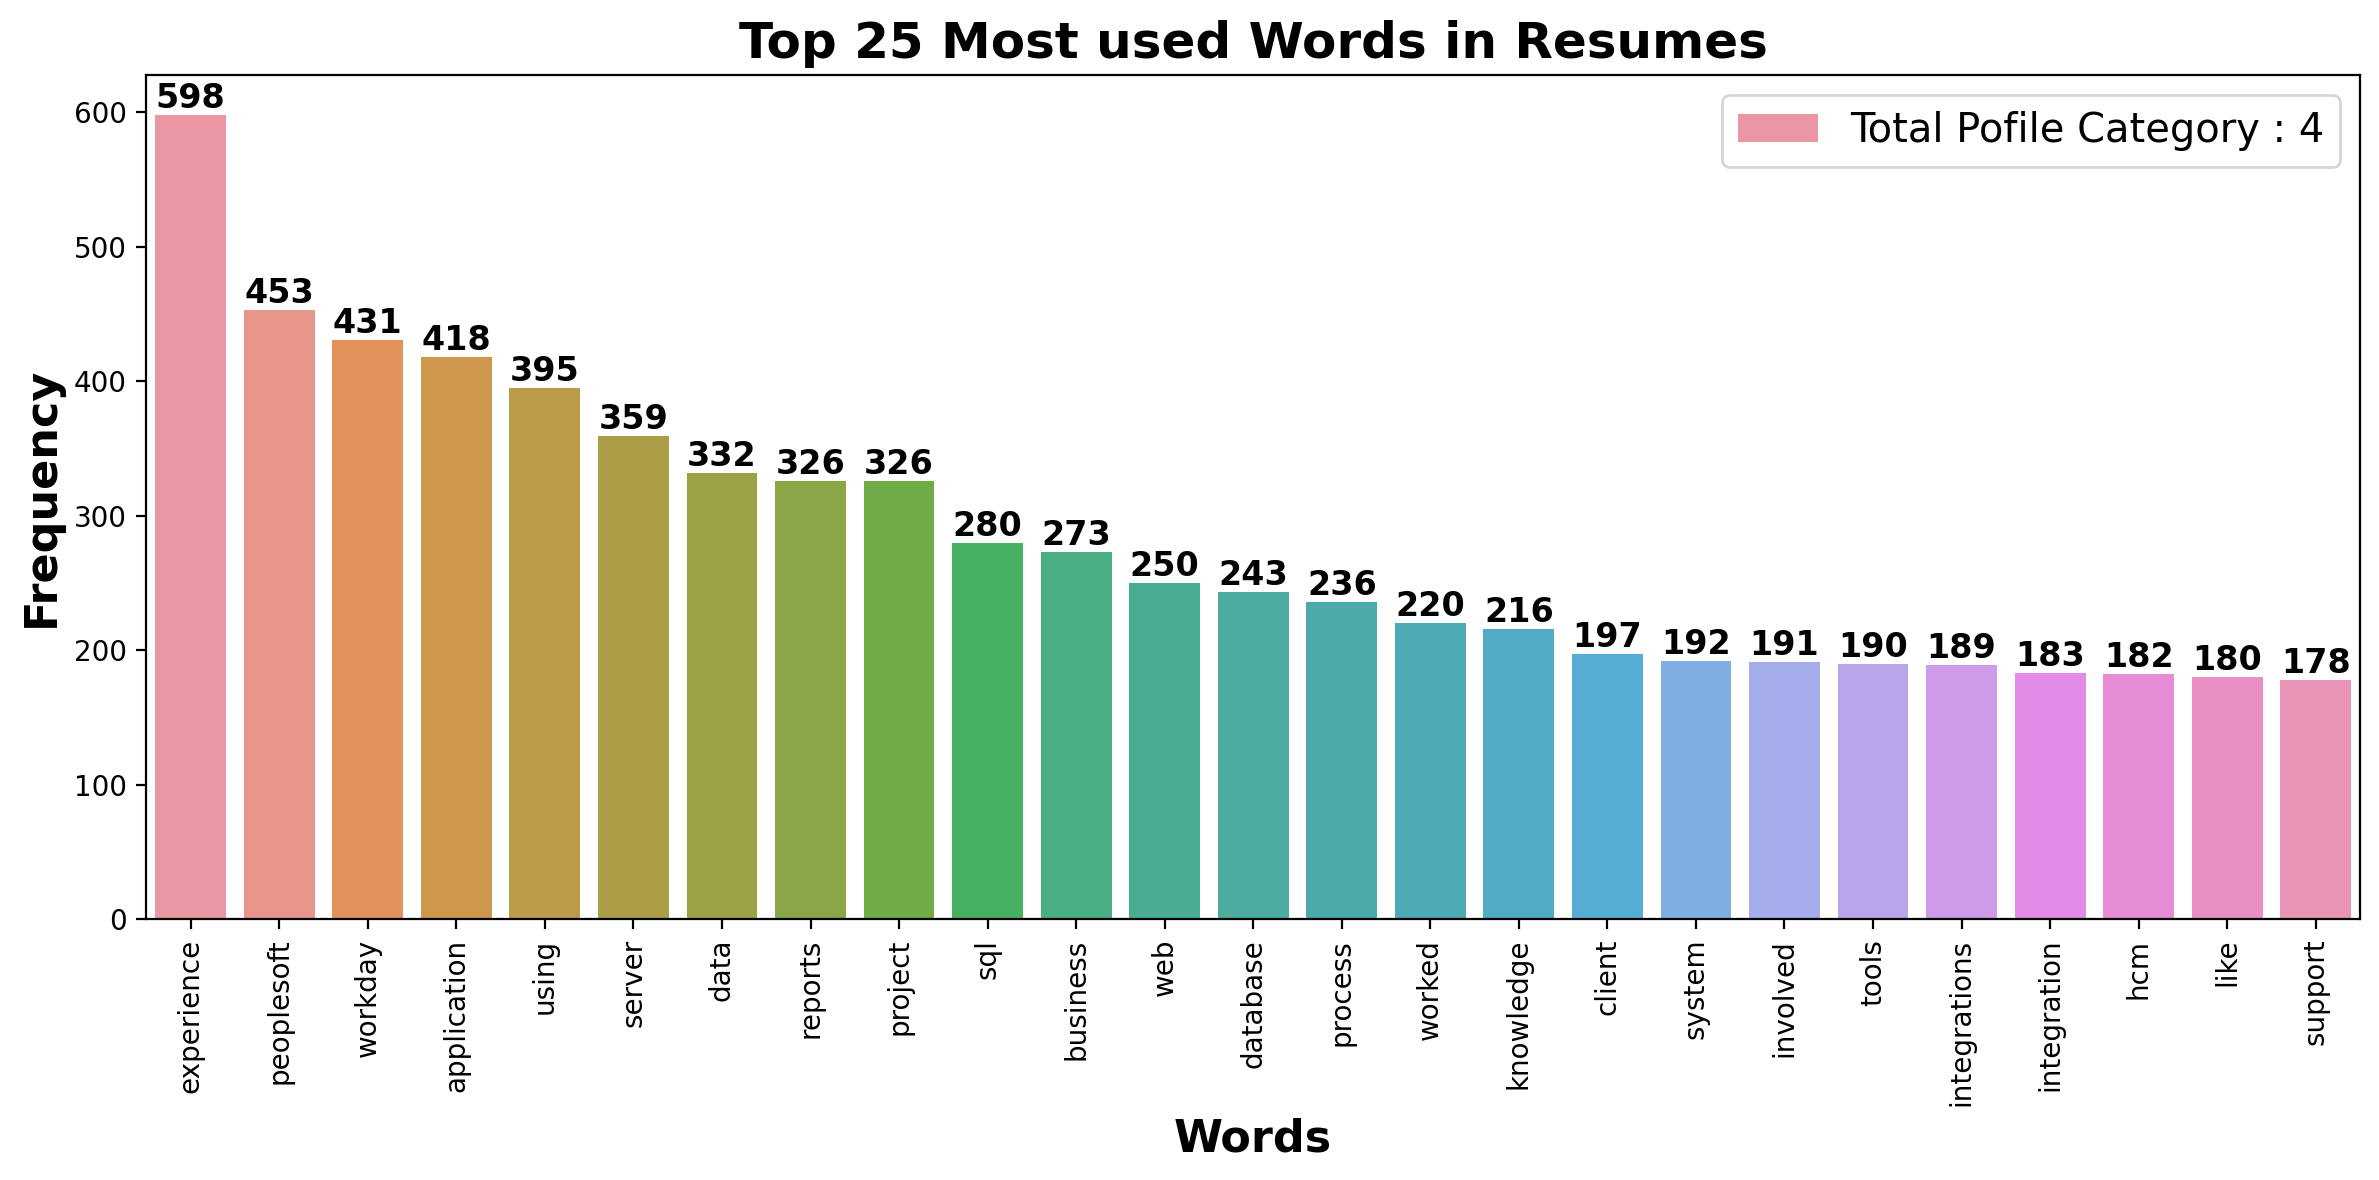

In [57]:
#creating a bar chart to visualize the top 25 most frequently used words (unigrams and bigrams) in the resume dataset, providing labels, frequencies
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram.Frequency.head(25), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig(r'C:/Users/user/Desktop/Github RAP/Top_Words_Bar', dpi = 500)

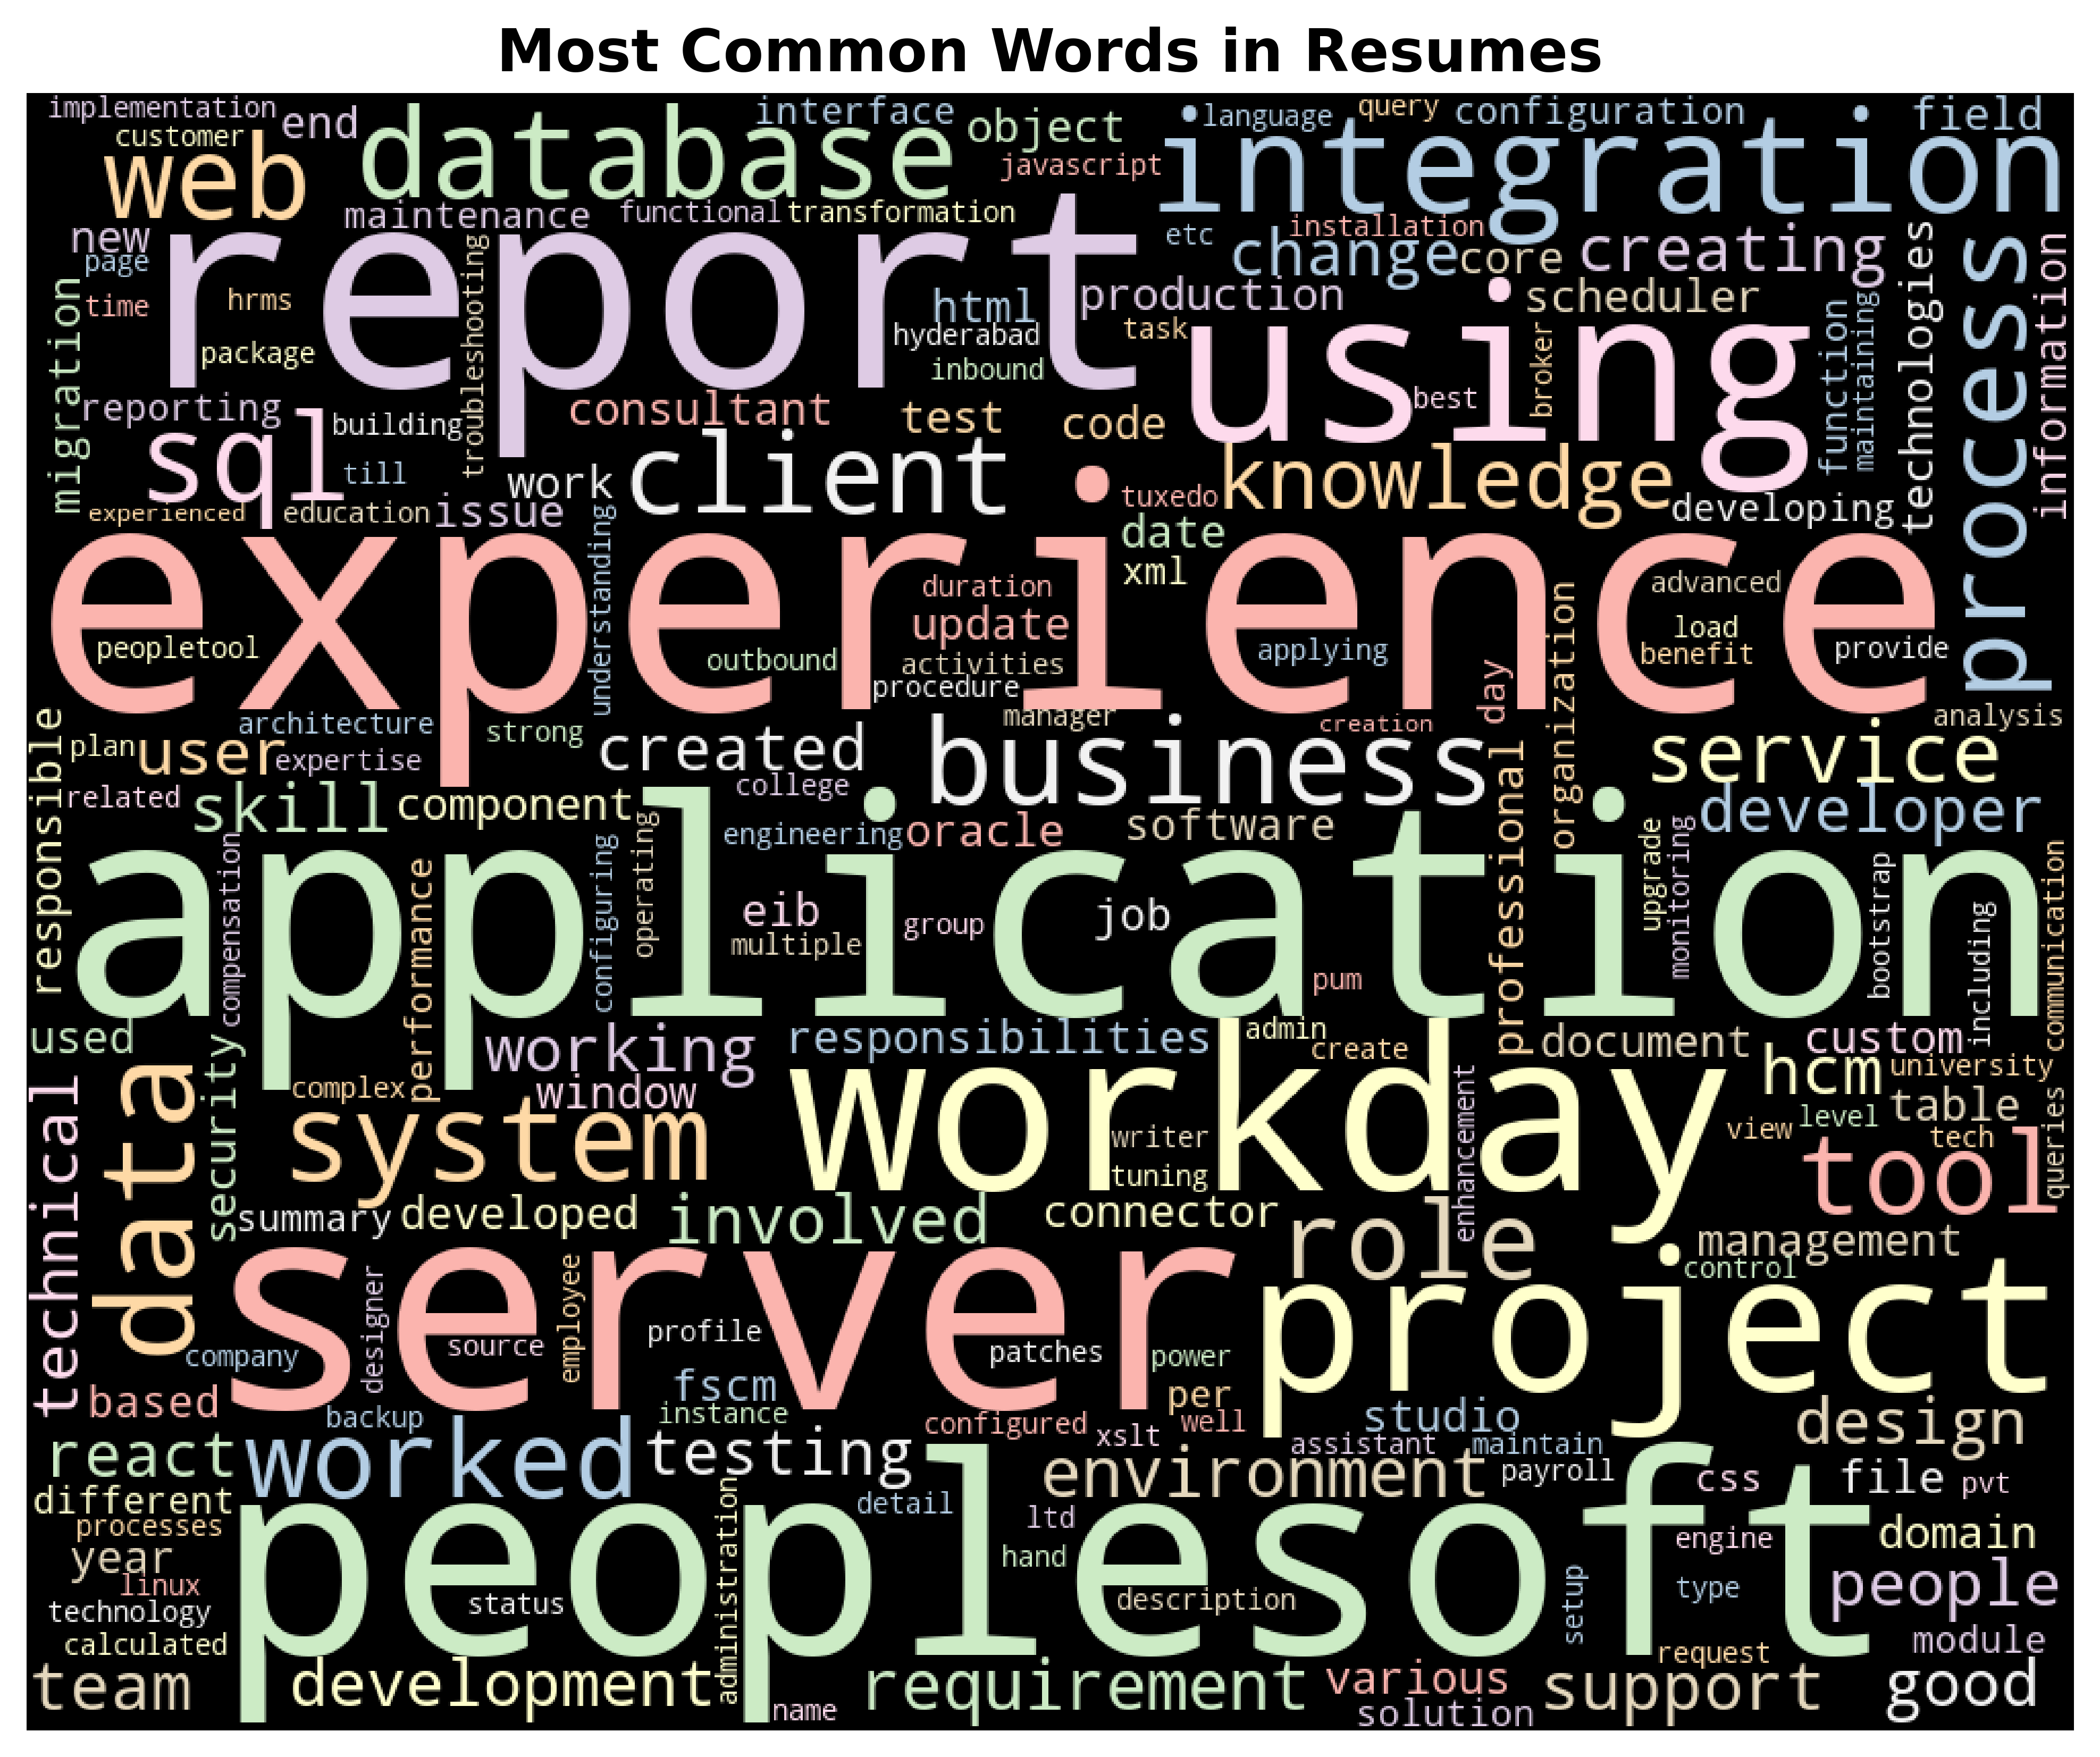

In [58]:
#creating a word cloud to visualize the most common words in the resume dataset
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file(r'C:/Users/user/Desktop/Github RAP/Word_Clowds.png')
plt.show()

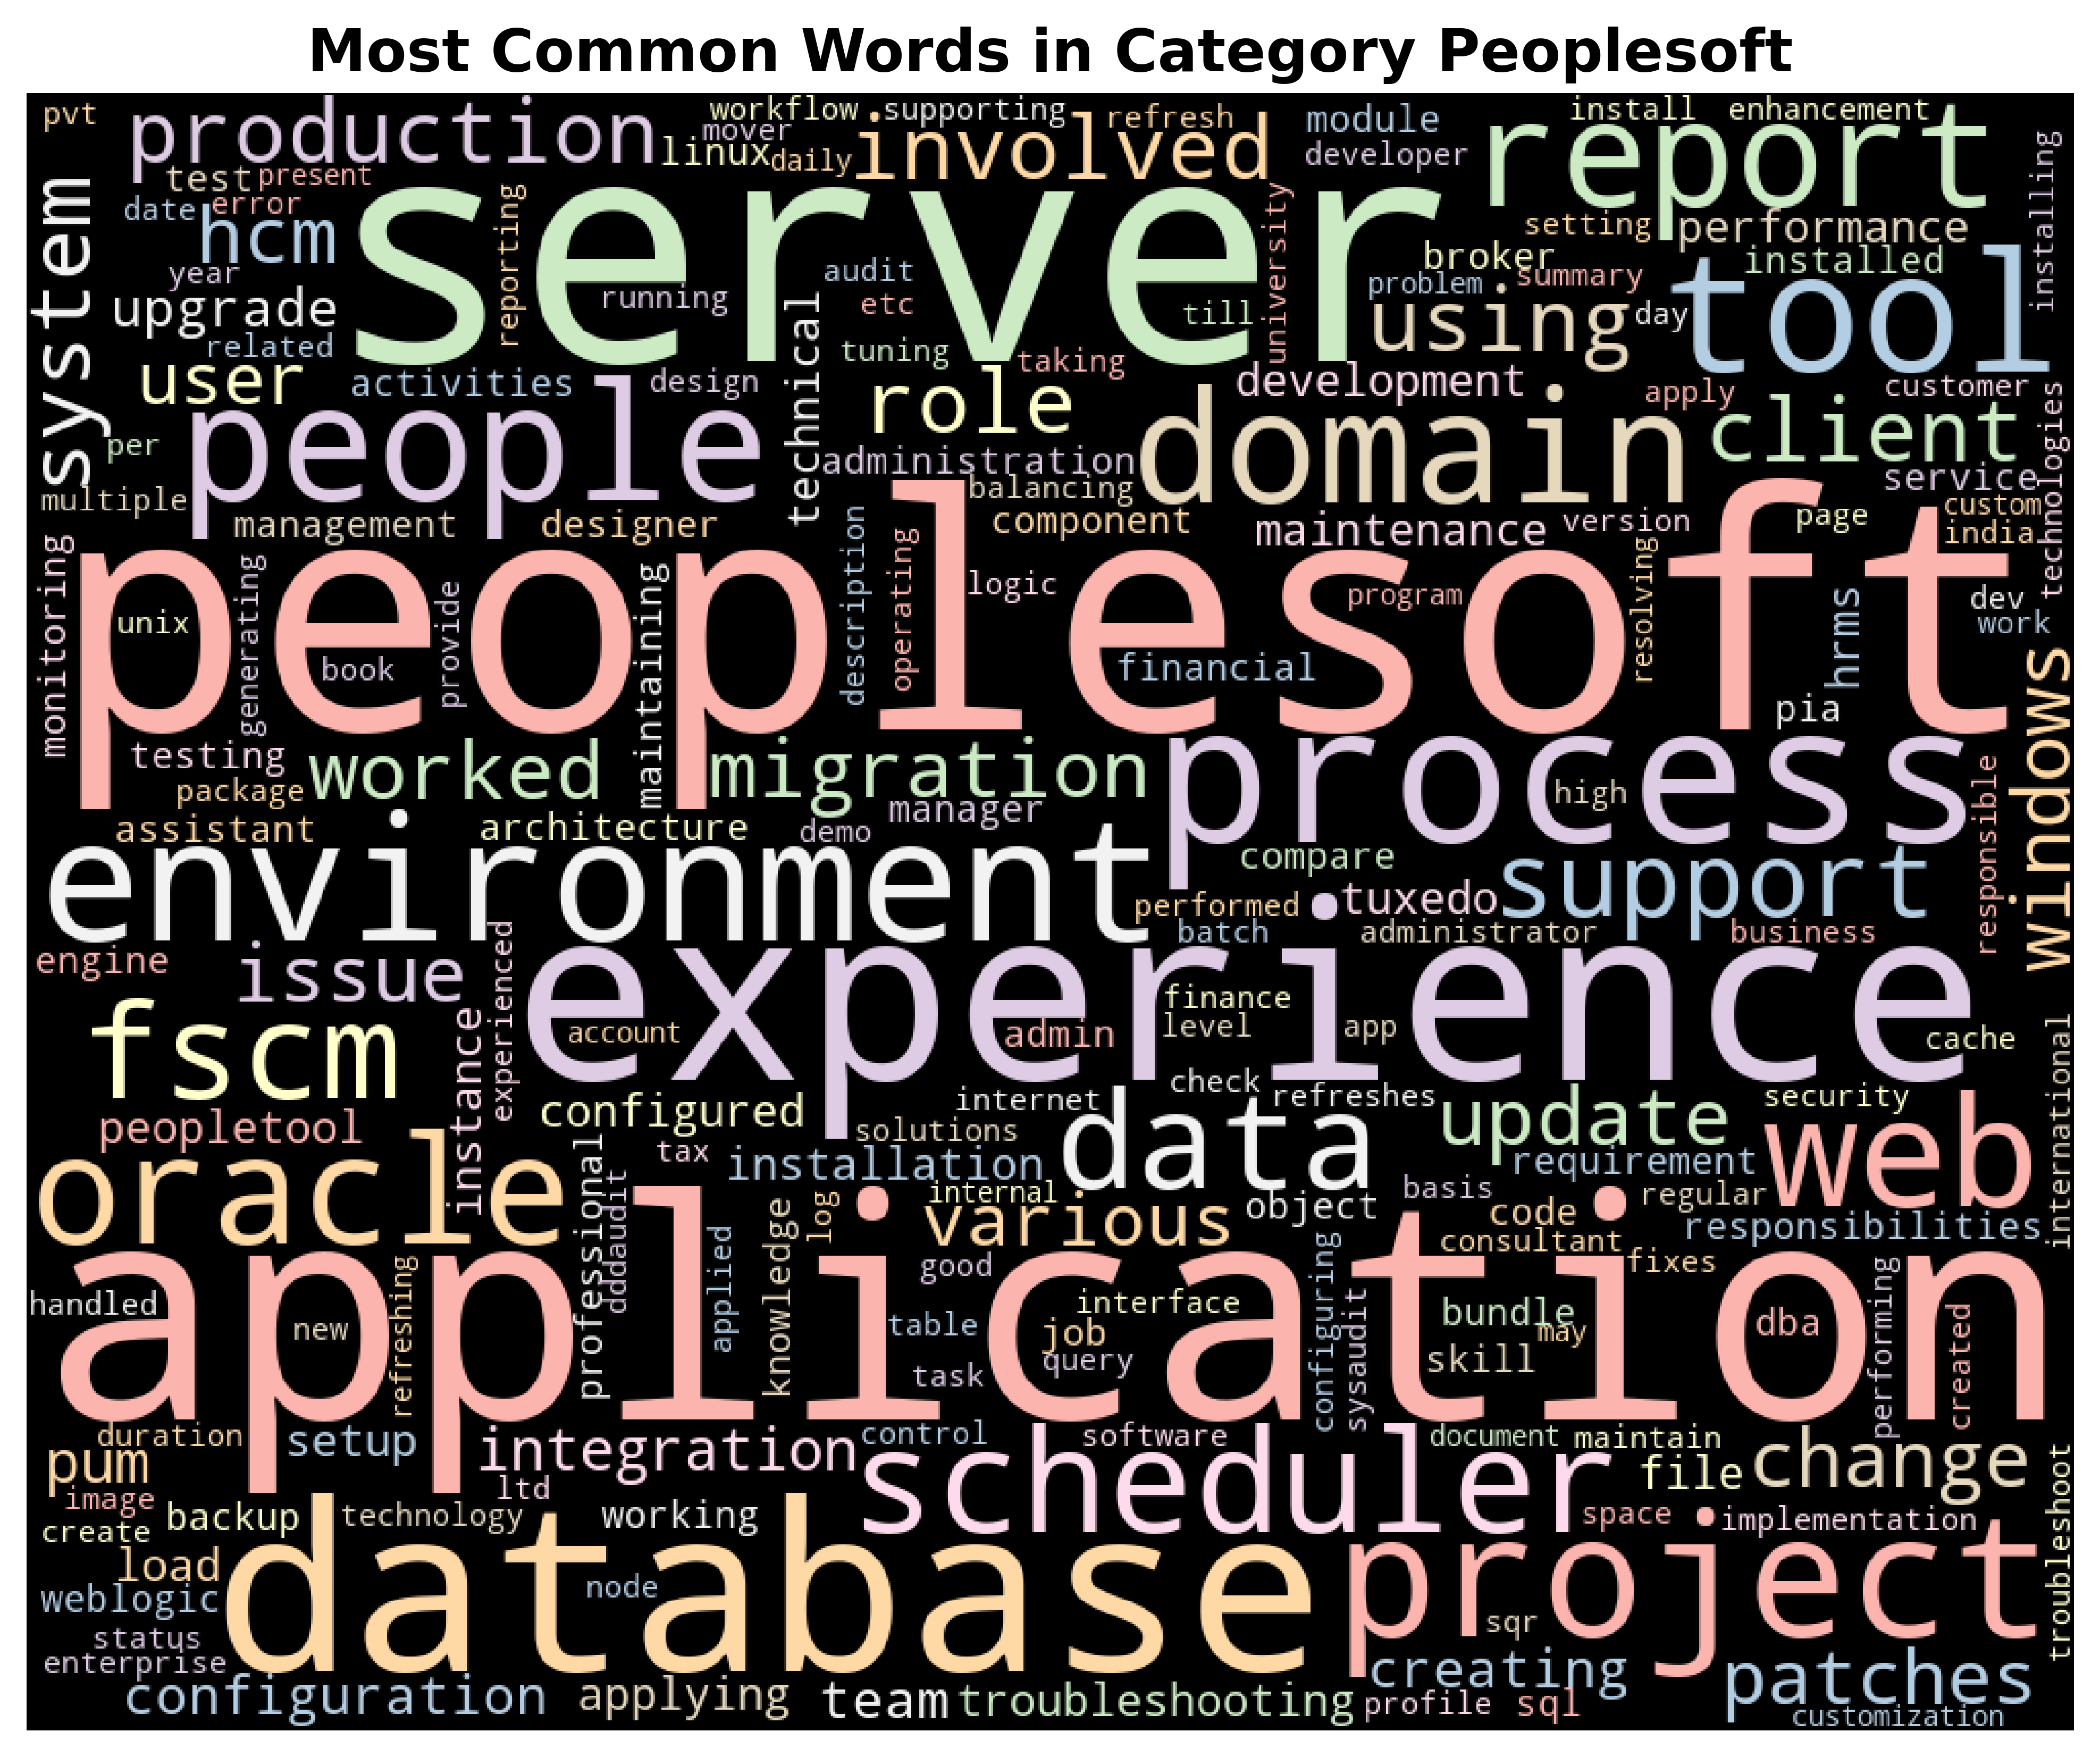

In [59]:
#creating a word cloud to visualize the most common words in the 'Resume_Details' column for the 'Peoplesoft' category in the resume dataset
text = " ".join(cat for cat in resume_data.loc[resume_data['Category'] == 'Peoplesoft'].Resume_Details ) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Category Peoplesoft', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file(r'C:/Users/user/Desktop/Github RAP/Word_Clowds_Peoplesoft.png')
plt.show()

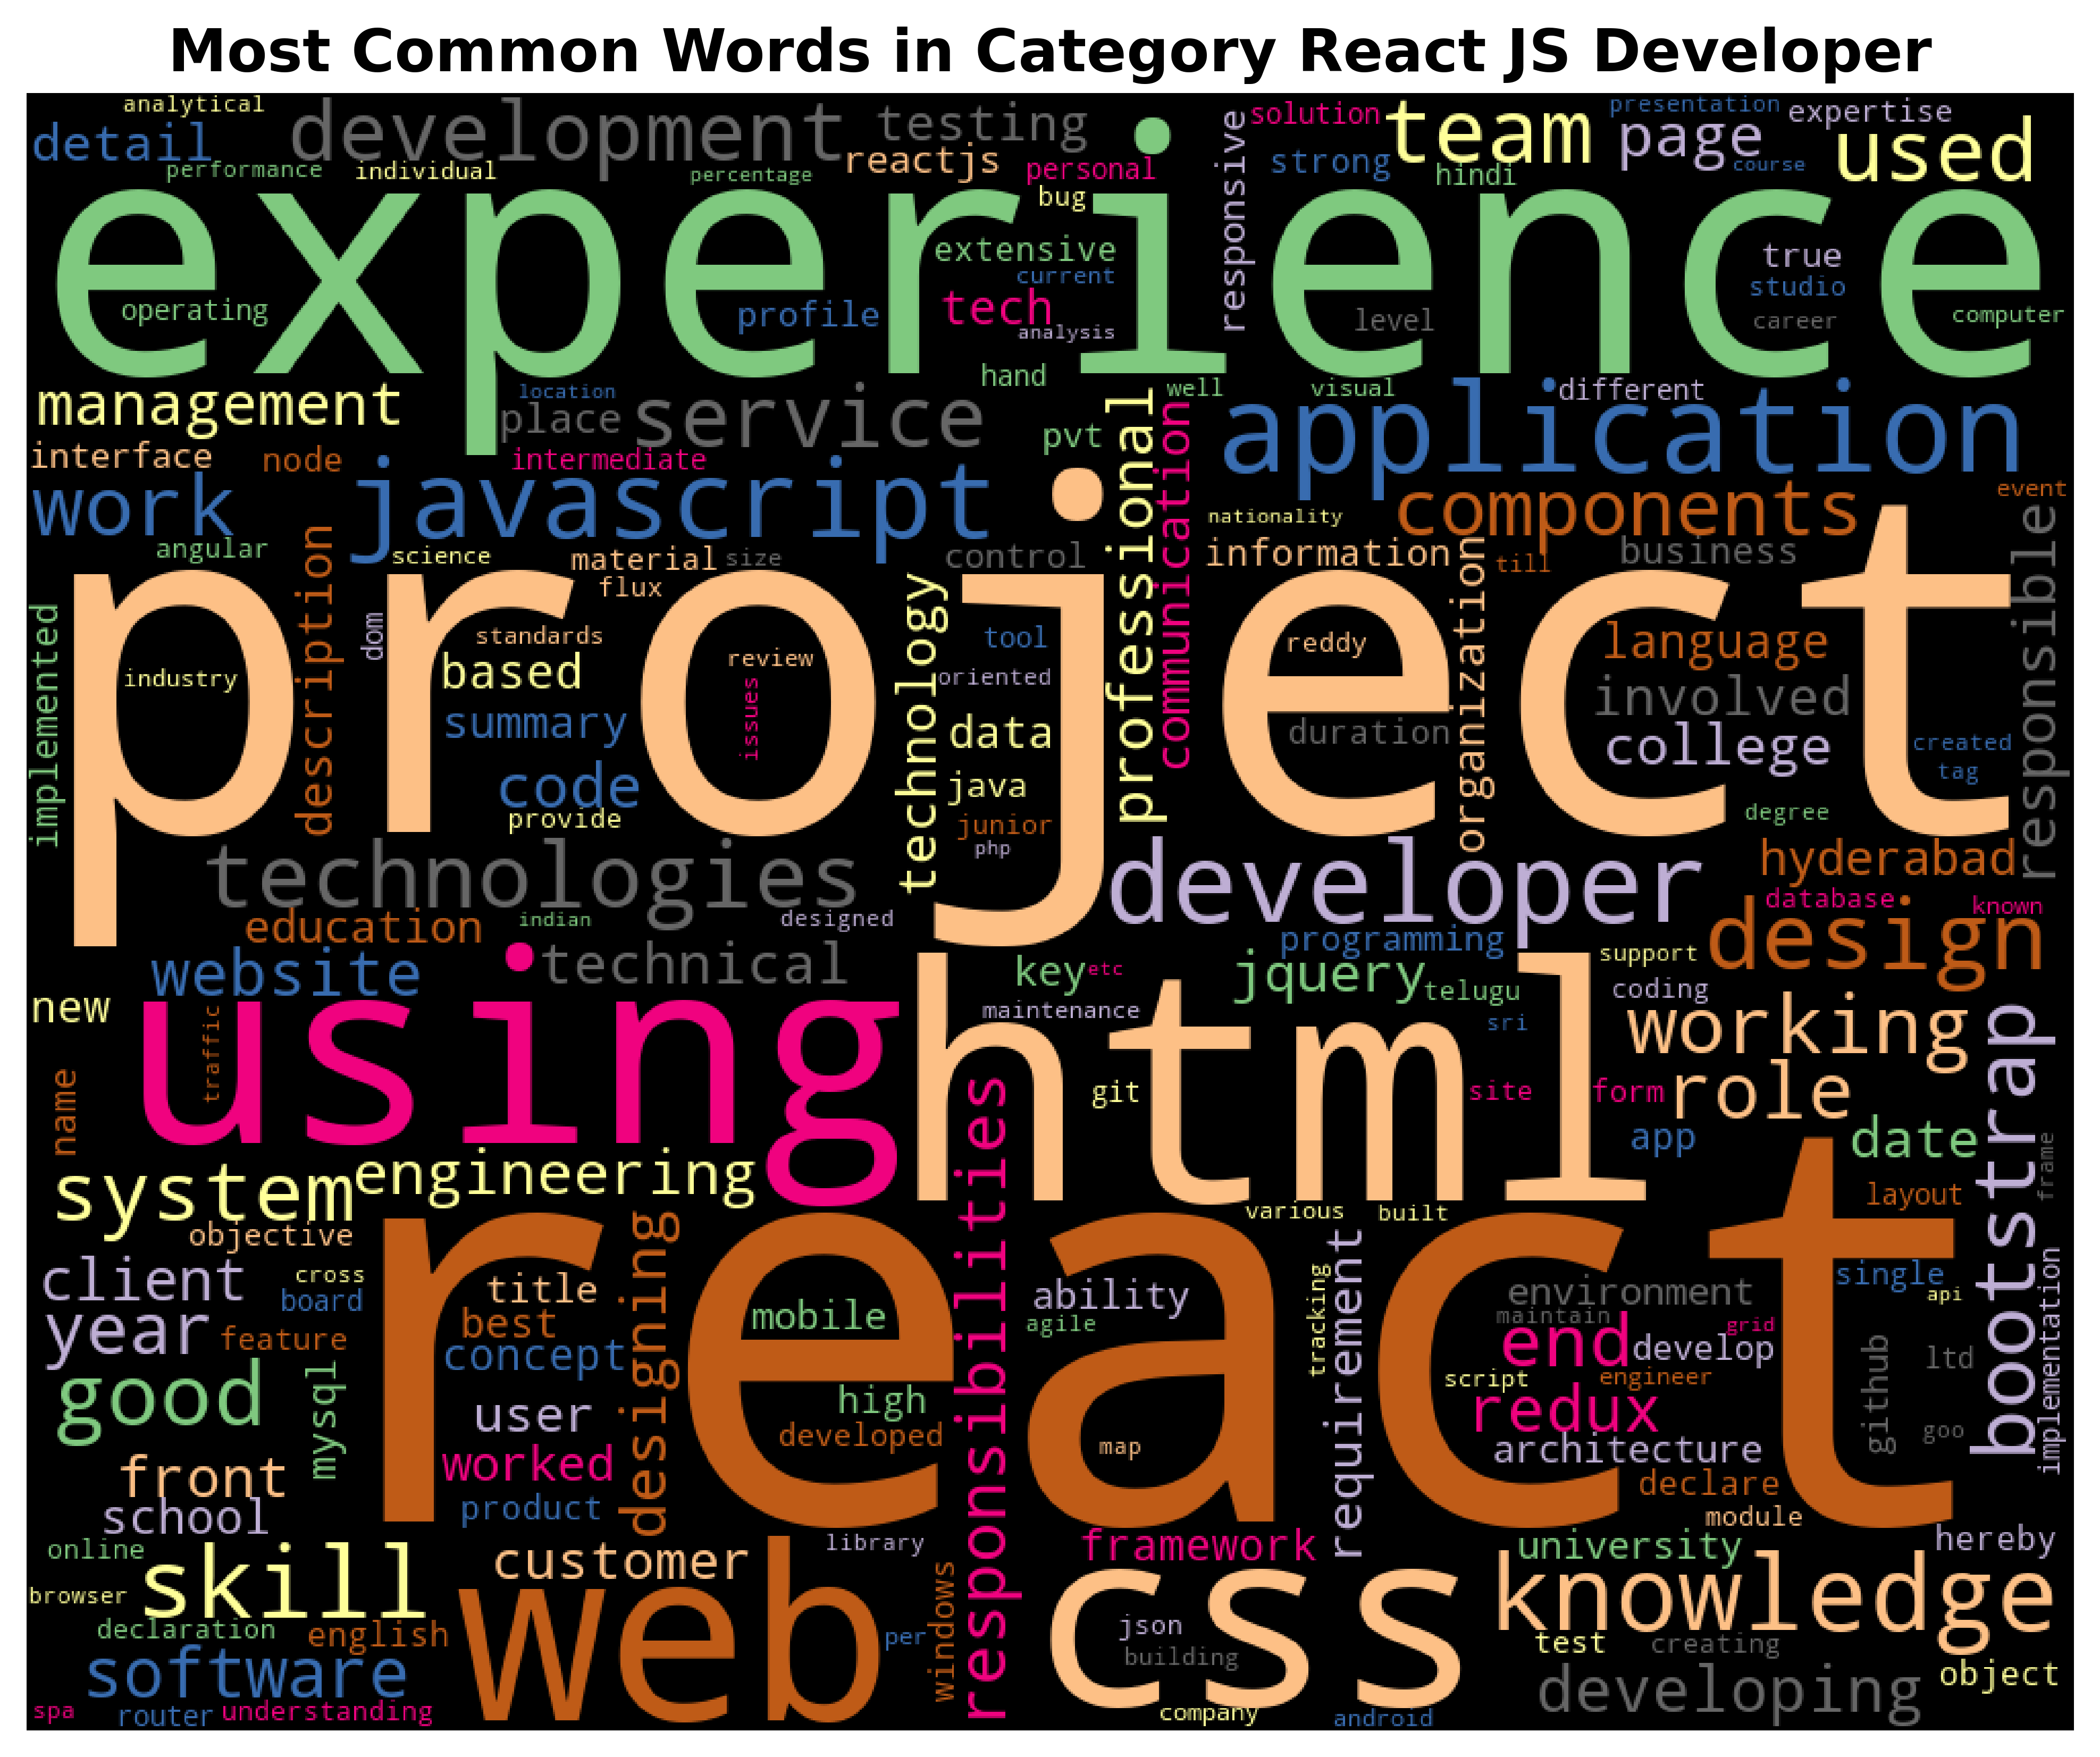

In [60]:
#creates a word cloud to visualize the most common words in the 'Resume_Details' column for the 'React JS Developer' category in the resume dataset
text = " ".join(cat for cat in resume_data.loc[resume_data['Category'] == 'React JS Developer'].Resume_Details ) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Accent", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Category React JS Developer', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file(r'C:/Users/user/Desktop/Github RAP/Word_Clowds_ReactJSDeveloper.png')
plt.show()

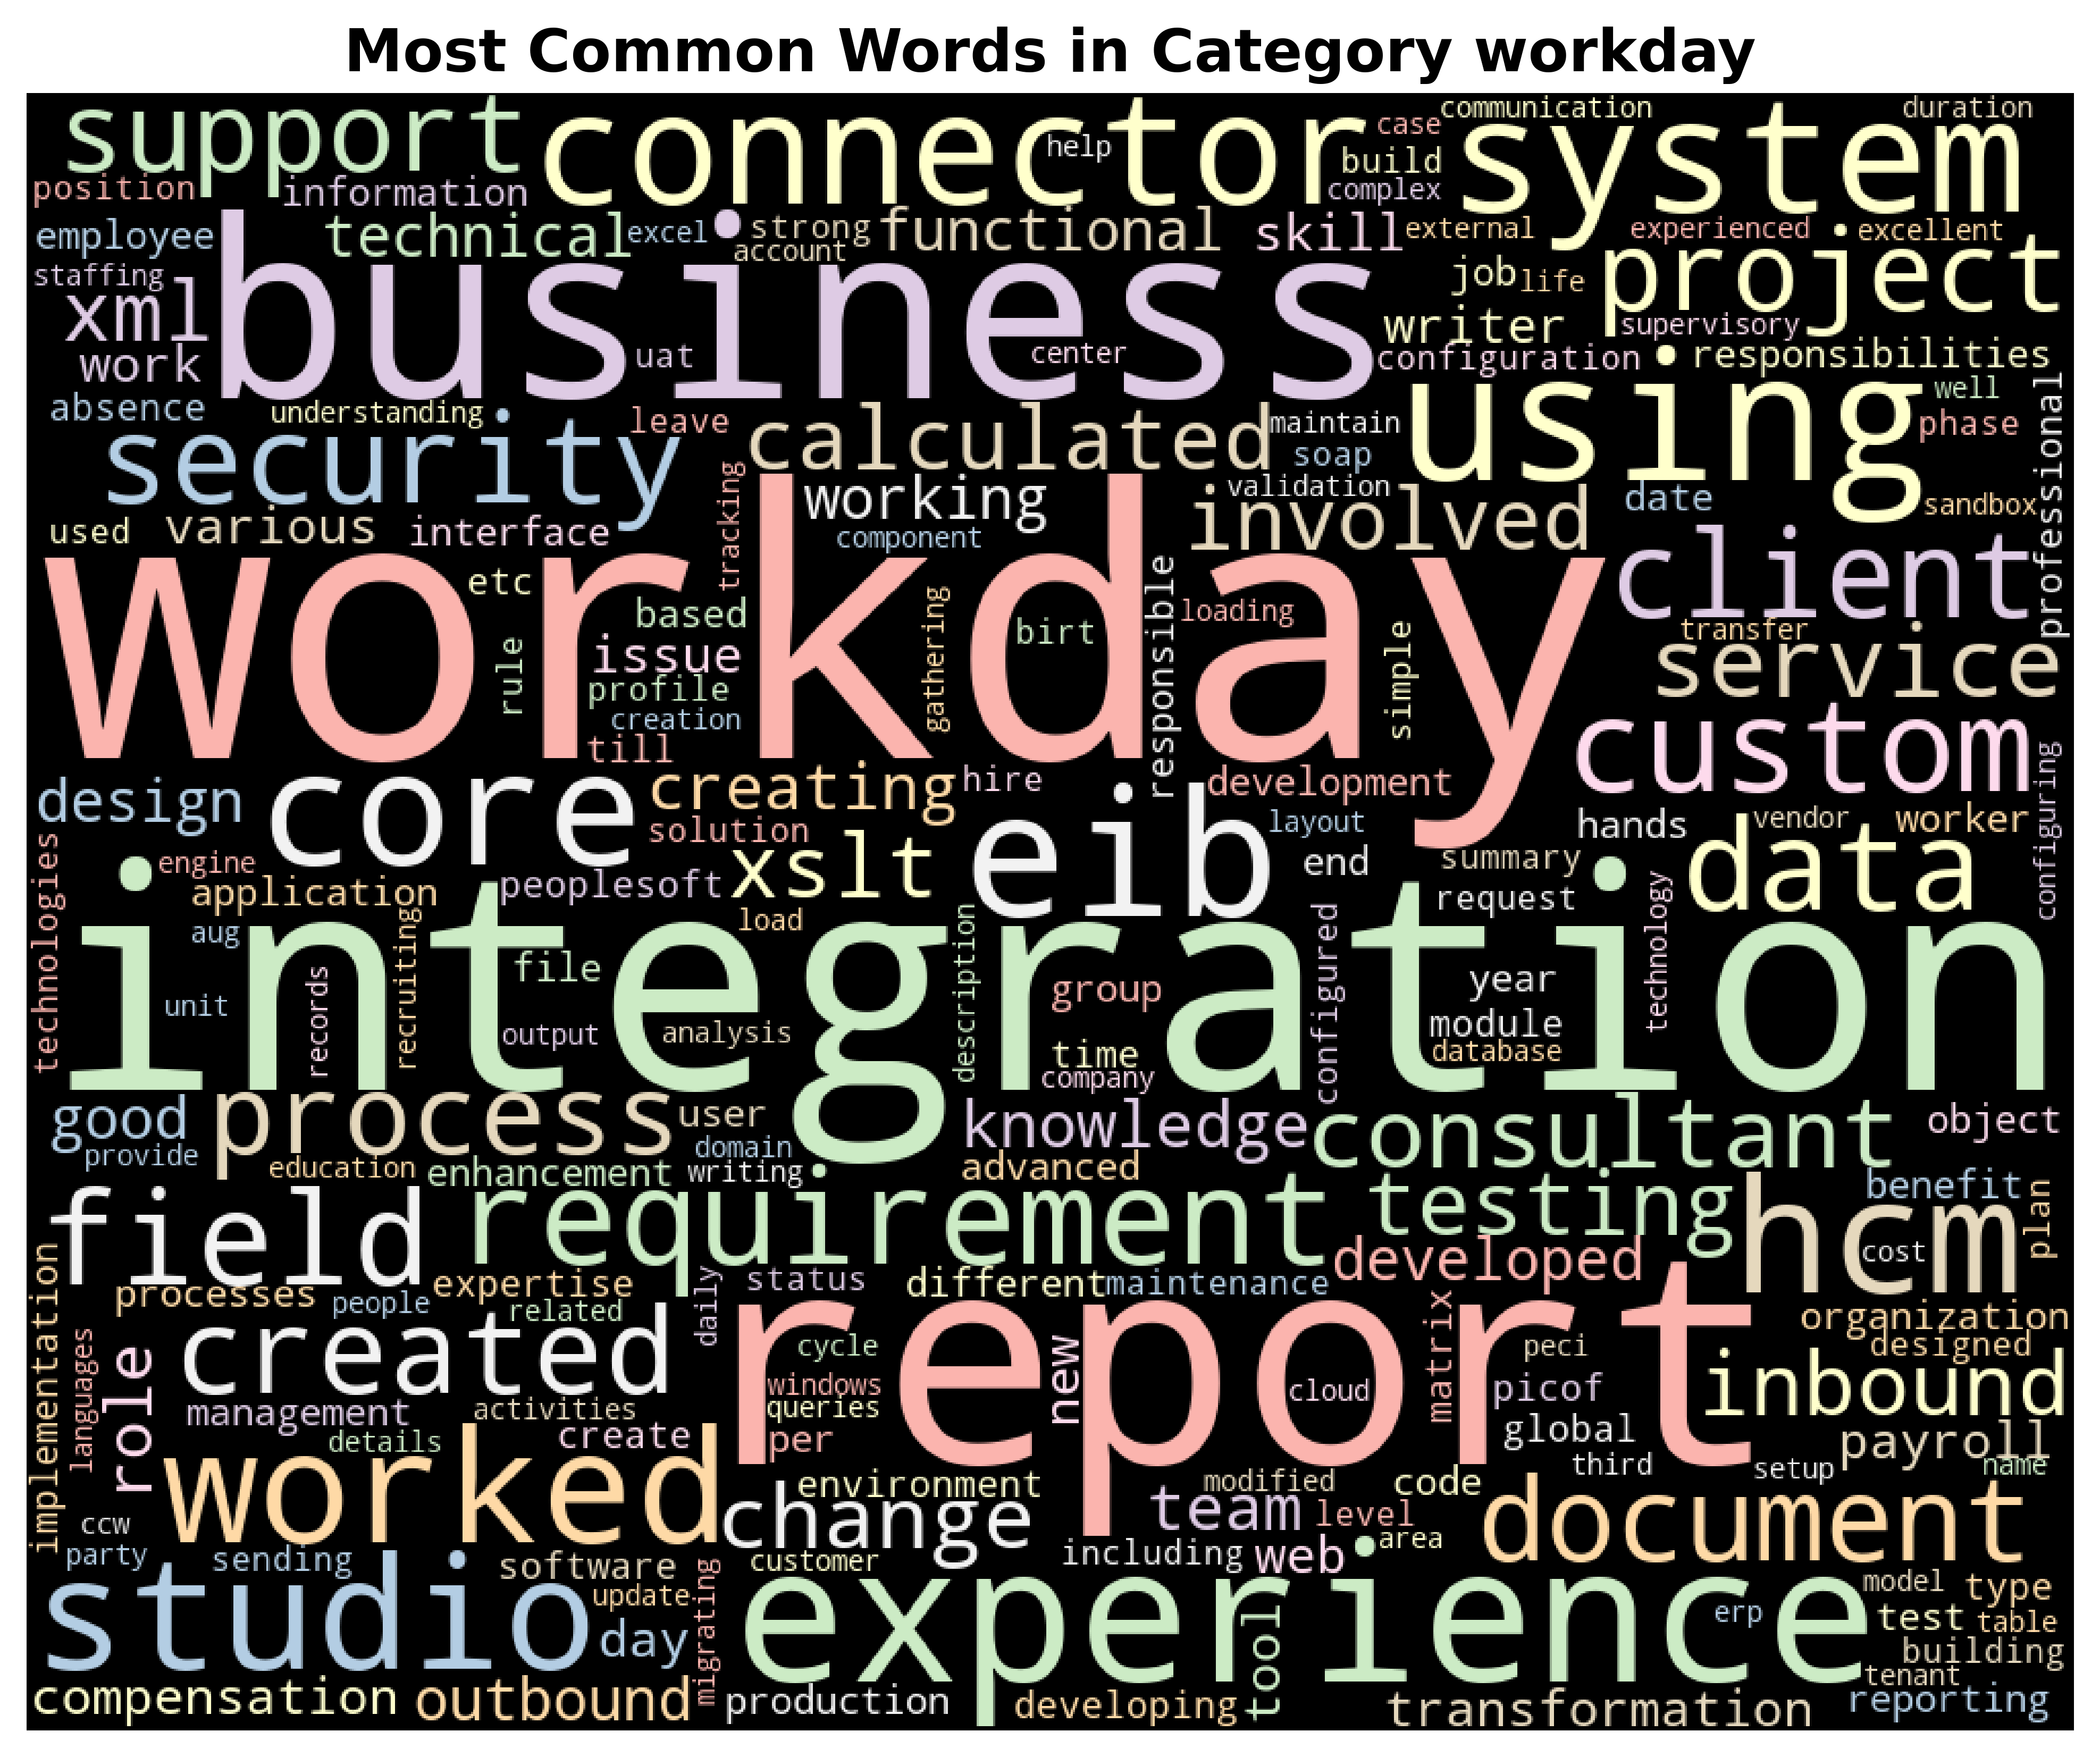

In [61]:
##creates a word cloud to visualize the most common words in the 'Resume_Details' column for the 'workday' category in the resume dataset
text = " ".join(cat for cat in resume_data.loc[resume_data['Category'] == 'workday'].Resume_Details ) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Category workday', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file(r'C:/Users/user/Desktop/Github RAP/Word_Clowds_workday.png')
plt.show()

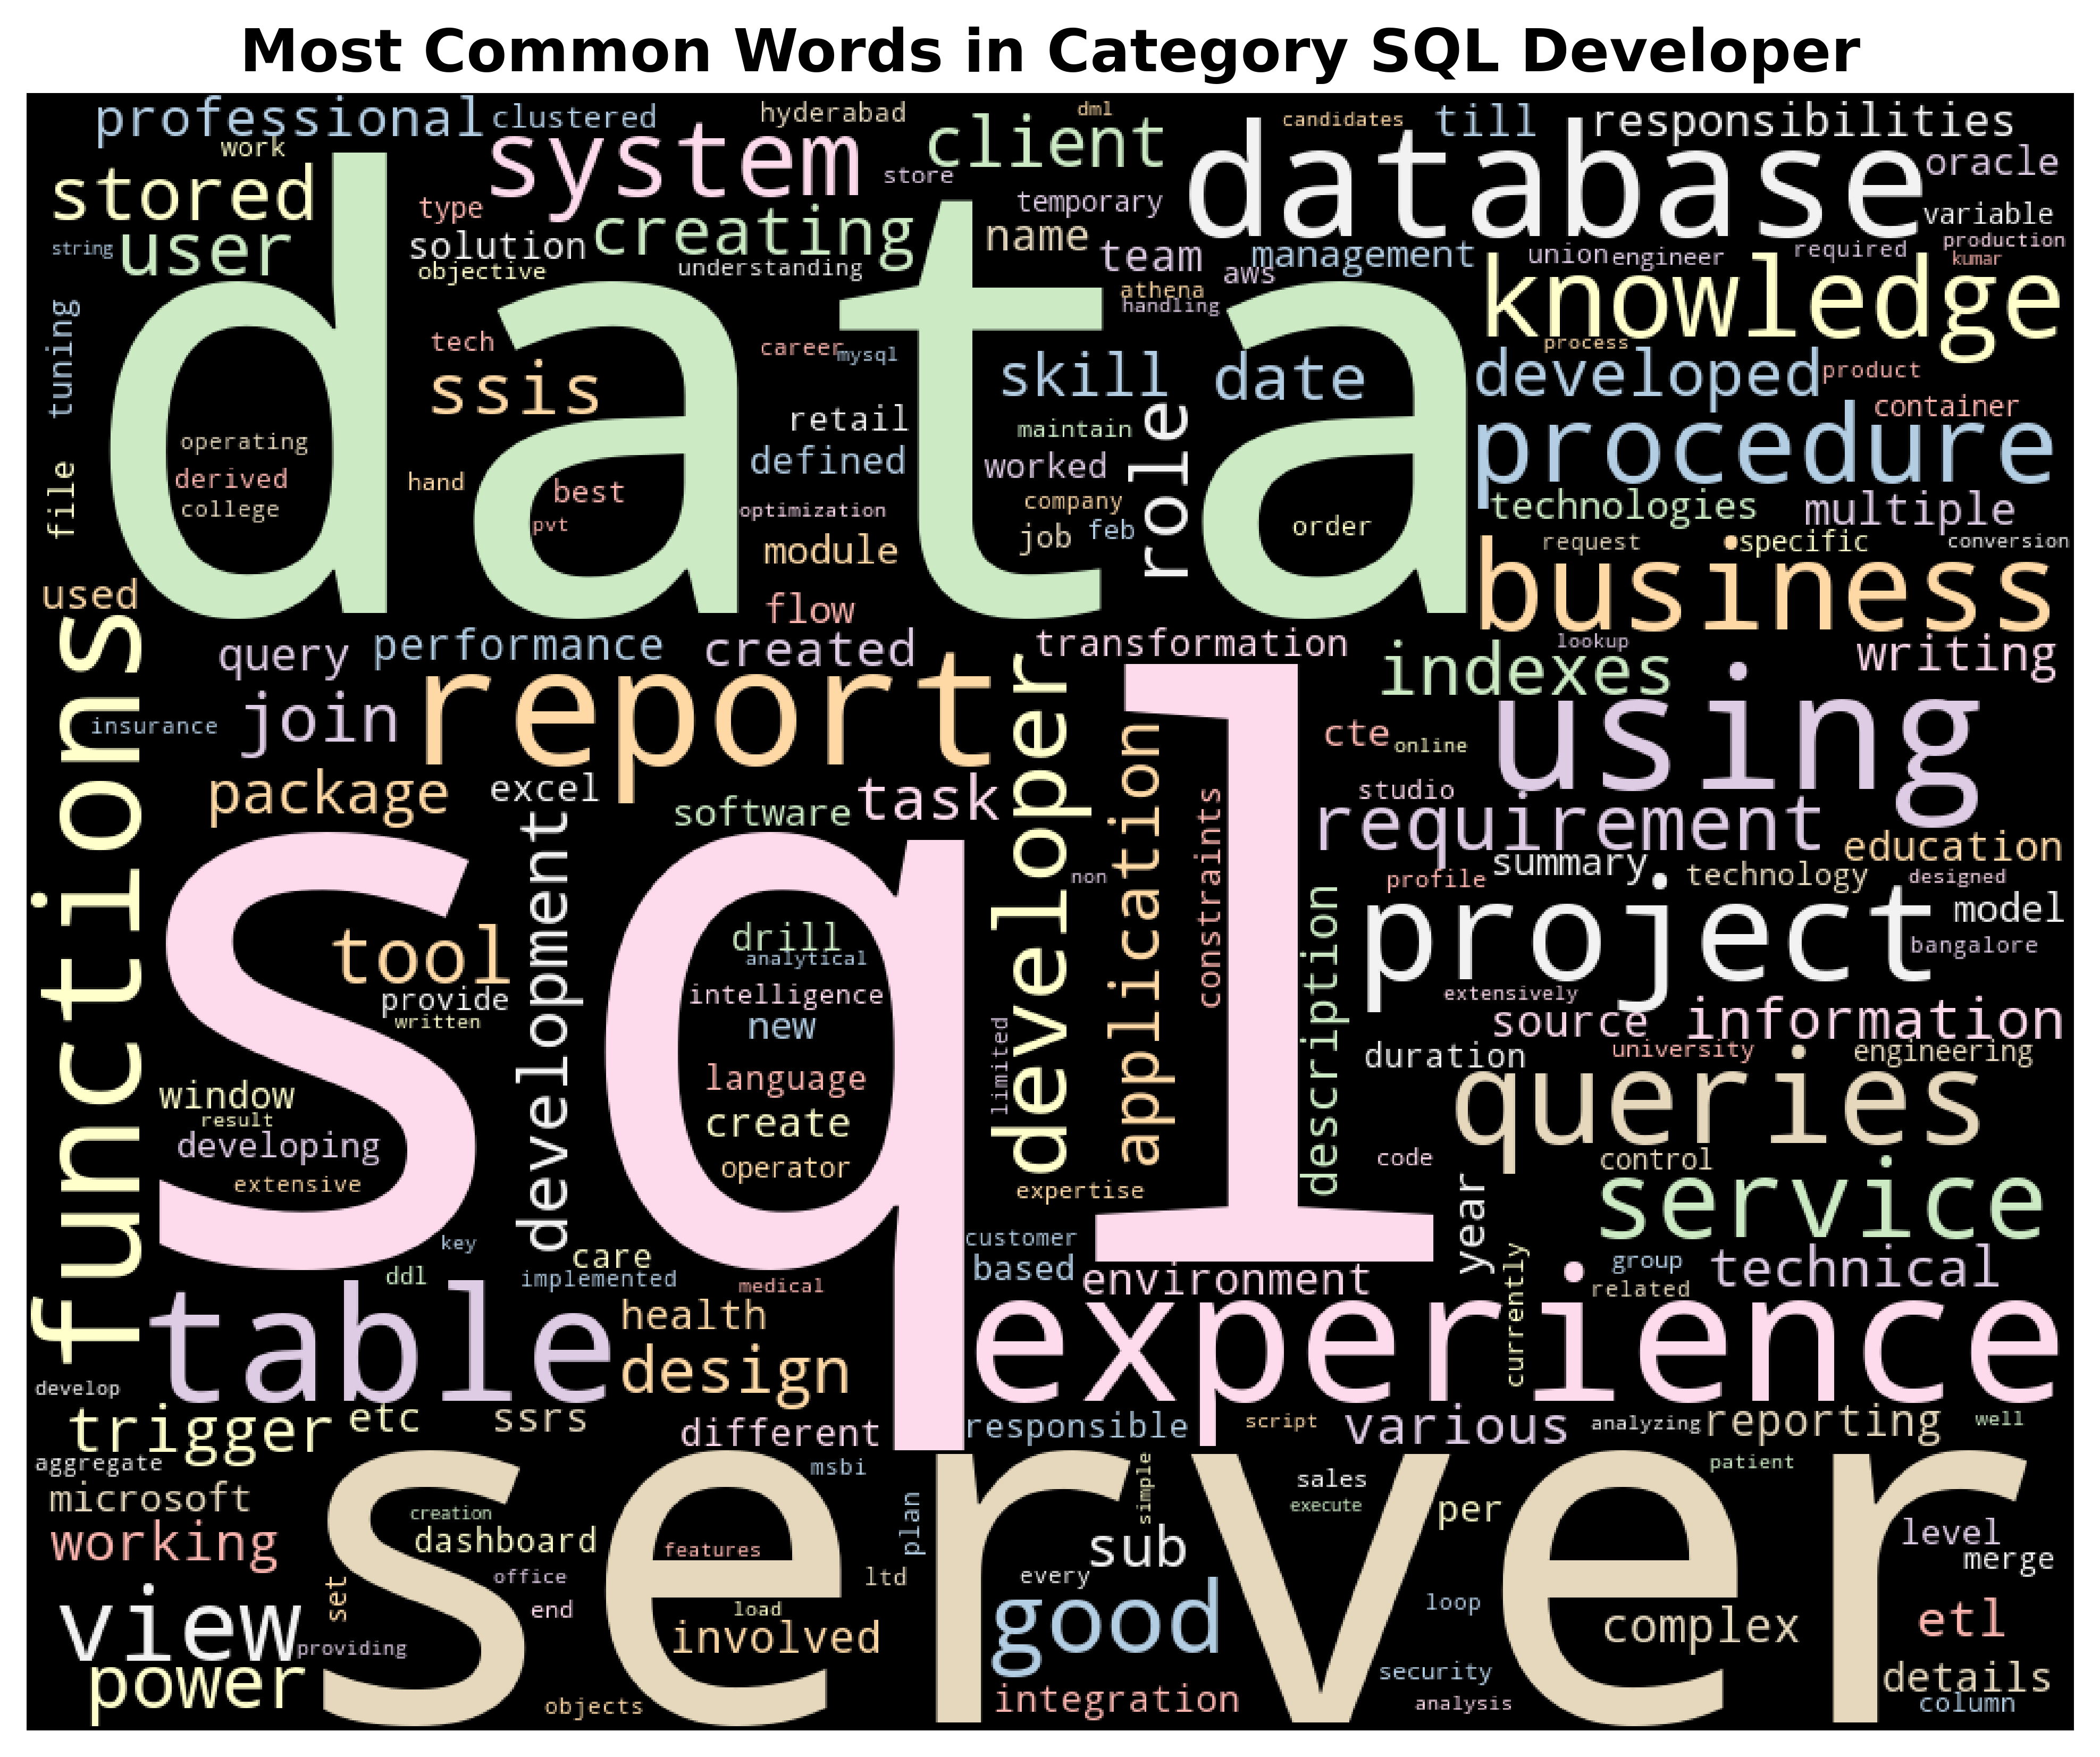

In [62]:
# #creates a word cloud to visualize the most common words in the 'Resume_Details' column for the 'SQL Developer' category in the resume dataset
text = " ".join(cat for cat in resume_data.loc[resume_data['Category'] == 'SQL Developer'].Resume_Details ) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Category SQL Developer', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file(r'C:/Users/user/Desktop/Github RAP/Word_Clowds_SQLDeveloper.png')
plt.show()

# Model building 

In [63]:
# Label Encoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["Category"])

resume_data

Category                                     Resume_Details  \
0   Peoplesoft  anubhav kumar singh core competencies scriptin...   
1   Peoplesoft  ananda rayudu profile summary years experience...   
2   Peoplesoft  peoplesoft database administrator gangareddy p...   
3   Peoplesoft  classification internal classification interna...   
4   Peoplesoft  priyanka ramadoss mountpleasant coonoor nilgir...   
..         ...                                                ...   
74     workday  workday integration consultant name sri krishn...   
75     workday  srikanth workday hcm consultant seeking suitab...   
76     workday  workday hcm fcm name kumar role workday consul...   
77     workday  venkateswarlu workday consultant professional ...   
78     workday  vinay kumar workday functional consultant expe...   

    LebelEncoding  
0               0  
1               0  
2               0  
3               0  
4               0  
..            ...  
74              3  
75              3  
76              3  
77              3  
78              3  

[79 rows x 3 columns]

In [64]:
resume_data.describe()

LebelEncoding
count      79.000000
mean        1.455696
std         1.141271
min         0.000000
25%         0.500000
50%         1.000000
75%         3.000000
max         3.000000

In [65]:
resume_data.isnull().sum()

Category          0
Resume_Details    0
LebelEncoding     0
dtype: int64

In [66]:
# Train-Test Split
X = resume_data['Resume_Details'].values
y = resume_data['Category'].values

In [67]:
#Splitting the data (X and y) into training and testing sets (75% training, 25% testing) using stratified sampling
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((59,), (20,))

### TF-IDF Vectorization

In [68]:
#initializing a TF-IDF vectorizer using scikit-learn with sublinear term frequency scaling and English stop words
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [69]:
#applying a TF-IDF vectorization to the training and testing sets (x_train and x_test)
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [70]:
x_train.shape, x_test.shape

((59, 3630), (20, 3630))

In [71]:
print(y_train),print(y_test)

['Peoplesoft' 'React JS Developer' 'Peoplesoft' 'workday' 'SQL Developer'
 'SQL Developer' 'React JS Developer' 'Peoplesoft' 'React JS Developer'
 'Peoplesoft' 'React JS Developer' 'SQL Developer' 'React JS Developer'
 'React JS Developer' 'workday' 'React JS Developer' 'SQL Developer'
 'React JS Developer' 'Peoplesoft' 'React JS Developer'
 'React JS Developer' 'workday' 'Peoplesoft' 'Peoplesoft' 'Peoplesoft'
 'SQL Developer' 'workday' 'workday' 'workday' 'React JS Developer'
 'workday' 'React JS Developer' 'SQL Developer' 'workday'
 'React JS Developer' 'workday' 'SQL Developer' 'workday' 'Peoplesoft'
 'Peoplesoft' 'SQL Developer' 'Peoplesoft' 'workday' 'SQL Developer'
 'Peoplesoft' 'workday' 'Peoplesoft' 'SQL Developer' 'workday' 'workday'
 'workday' 'Peoplesoft' 'React JS Developer' 'React JS Developer'
 'React JS Developer' 'Peoplesoft' 'React JS Developer'
 'React JS Developer' 'workday']
['Peoplesoft' 'Peoplesoft' 'React JS Developer' 'workday' 'workday'
 'React JS Developer' 'R

(None, None)

# Logistic Regression Model

In [72]:
# Creating a Logistic Regression model
model_lgr = LogisticRegression()
# Training the model on the TF-IDF transformed training data
model_lgr.fit(x_train, y_train)
# Predicting labels for the testing set
y_pred = model_lgr.predict(x_test)
# Calculating accuracy score
accuracy_lgr = accuracy_score(y_test, y_pred)
# Printing accuracy scores
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
# Printing a classification report
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

# Calculating additional metrics
precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Classification report for classifier LogisticRegression():
                    precision    recall  f1-score   support

        Peoplesoft       1.00      0.80      0.89         5
React JS Developer       0.86      1.00      0.92         6
     SQL Developer       1.00      1.00      1.00         4
           workday       1.00      1.00      1.00         5

          accuracy                           0.95        20
         macro avg       0.96      0.95      0.95        20
      weighted avg       0.96      0.95      0.95        20




In [73]:
# Cross Validation
# Defining the cross-validation strategy (e.g., Stratified K-Fold with 5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Performing cross-validation and getting accuracy scores
cv_scores = cross_val_score(model_lgr, x_train, y_train, cv=cv, scoring='accuracy')
# Printing the accuracy scores for each fold
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} Accuracy: {score}")
# Calculating and printing the mean and standard deviation of accuracy scores
mean_accuracy_lgr = cv_scores.mean()
std_accuracy_lgr = cv_scores.std()
print(f"Mean Accuracy: {mean_accuracy_lgr}")
print(f"Standard Deviation of Accuracy: {std_accuracy_lgr}")

Fold 1 Accuracy: 1.0
Fold 2 Accuracy: 0.9166666666666666
Fold 3 Accuracy: 1.0
Fold 4 Accuracy: 0.75
Fold 5 Accuracy: 0.8181818181818182
Mean Accuracy: 0.8969696969696969
Standard Deviation of Accuracy: 0.09942442252438131


# KNN Classifier Model

In [74]:
# Creating a K-Nearest Neighbors (KNN) classifier with 41 neighbors
model_knn = KNeighborsClassifier(n_neighbors=41)
# Training the model on the TF-IDF transformed training data
model_knn.fit(x_train, y_train)
# Predicting labels for the testing set
y_pred = model_knn.predict(x_test)
# Calculating accuracy score
accuracy_knn = accuracy_score(y_test, y_pred)
# Printing accuracy scores
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
# Printing a classification report
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

# Calculating additional metrics
precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.64
Accuracy of  test set    : 0.60
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
                    precision    recall  f1-score   support

        Peoplesoft       0.50      0.20      0.29         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       0.00      0.00      0.00         4
           workday       0.42      1.00      0.59         5

          accuracy                           0.60        20
         macro avg       0.48      0.55      0.47        20
      weighted avg       0.53      0.60      0.52        20




In [75]:
# Cross Validation
# Defining the cross-validation strategy (e.g., Stratified K-Fold with 5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Performing cross-validation and getting accuracy scores
cv_scores = cross_val_score(model_knn, x_train, y_train, cv=cv, scoring='accuracy')
# Print the accuracy scores for each fold
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} Accuracy: {score}")
# Calculating and printing the mean and standard deviation of accuracy scores
mean_accuracy_knn = cv_scores.mean()
std_accuracy_knn = cv_scores.std()
print(f"Mean Accuracy: {mean_accuracy_knn}")
print(f"Standard Deviation of Accuracy: {std_accuracy_knn}")

Fold 1 Accuracy: 0.5833333333333334
Fold 2 Accuracy: 0.5833333333333334
Fold 3 Accuracy: 0.5833333333333334
Fold 4 Accuracy: 0.5833333333333334
Fold 5 Accuracy: 0.6363636363636364
Mean Accuracy: 0.593939393939394
Standard Deviation of Accuracy: 0.021212121212121193


# Decision Tree Classifier model

In [76]:
# Creating a Decision Tree classifier with the Gini impurity criterion
model_DT = DecisionTreeClassifier(criterion='gini')
# Training the model on the TF-IDF transformed training data
model_DT.fit(x_train, y_train)
# Predicting labels for the testing set
y_pred = model_DT.predict(x_test)
# Calculating accuracy score
accuracy_DT = accuracy_score(y_test, y_pred)
# Printing accuracy scores
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
# Printing a classification report
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

# Calculating additional metrics
precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier DecisionTreeClassifier():
                    precision    recall  f1-score   support

        Peoplesoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




In [77]:
# Cross Validation
# Defining the cross-validation strategy (e.g., Stratified K-Fold with 5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Performing cross-validation and getting accuracy scores
cv_scores = cross_val_score(model_DT, x_train, y_train, cv=cv, scoring='accuracy')
# Printing the accuracy scores for each fold
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} Accuracy: {score}")
# Calculating and printing the mean and standard deviation of accuracy scores
mean_accuracy_DT = cv_scores.mean()
std_accuracy_DT = cv_scores.std()
print(f"Mean Accuracy: {mean_accuracy_DT}")
print(f"Standard Deviation of Accuracy: {std_accuracy_DT}")

Fold 1 Accuracy: 1.0
Fold 2 Accuracy: 0.9166666666666666
Fold 3 Accuracy: 1.0
Fold 4 Accuracy: 0.8333333333333334
Fold 5 Accuracy: 1.0
Mean Accuracy: 0.95
Standard Deviation of Accuracy: 0.06666666666666667


# Random Forest Classifier model

In [78]:
# Creating a Random Forest classifier with 200 decision trees
model_RF = RandomForestClassifier(n_estimators=200)
# Training the model on the TF-IDF transformed training data
model_RF.fit(x_train, y_train)
# Predicting labels for the testing set
y_pred = model_RF.predict(x_test)
# Calculating accuracy score
accuracy_RF = accuracy_score(y_test, y_pred)
# Printing accuracy scores
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
# Printing a classification report
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

# Calculating additional metrics
precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier RandomForestClassifier(n_estimators=200):
                    precision    recall  f1-score   support

        Peoplesoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




In [79]:
# Cross Validation
# Defining the cross-validation strategy (e.g., Stratified K-Fold with 5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Performing cross-validation and getting accuracy scores
cv_scores = cross_val_score(model_RF, x_train, y_train, cv=cv, scoring='accuracy')
# Printing the accuracy scores for each fold
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} Accuracy: {score}")
# Calculating and printing the mean and standard deviation of accuracy scores
mean_accuracy_RF = cv_scores.mean()
std_accuracy_RF = cv_scores.std()
print(f"Mean Accuracy: {mean_accuracy_RF}")
print(f"Standard Deviation of Accuracy: {std_accuracy_RF}")

Fold 1 Accuracy: 1.0
Fold 2 Accuracy: 0.9166666666666666
Fold 3 Accuracy: 1.0
Fold 4 Accuracy: 1.0
Fold 5 Accuracy: 1.0
Mean Accuracy: 0.9833333333333332
Standard Deviation of Accuracy: 0.03333333333333335


# SVM (Support Vector Machine) Classifier model

In [80]:
# Creating a Support Vector Machine (SVM) classifier
model_svm = SVC()
# Training the model on the TF-IDF transformed training data
model_svm.fit(x_train, y_train)
# Predicting labels for the testing set
y_pred = model_svm.predict(x_test)
# Calculating accuracy score
accuracy_svm = accuracy_score(y_test, y_pred)
# Printing accuracy scores
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
# Printing a classification report
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

# Calculating additional metrics
precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Classification report for classifier SVC():
                    precision    recall  f1-score   support

        Peoplesoft       1.00      0.80      0.89         5
React JS Developer       0.86      1.00      0.92         6
     SQL Developer       1.00      1.00      1.00         4
           workday       1.00      1.00      1.00         5

          accuracy                           0.95        20
         macro avg       0.96      0.95      0.95        20
      weighted avg       0.96      0.95      0.95        20




In [81]:
# Cross Validation
# Defining the cross-validation strategy (e.g., Stratified K-Fold with 5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Performing cross-validation and getting accuracy scores
cv_scores = cross_val_score(model_svm, x_train, y_train, cv=cv, scoring='accuracy')
# Printing the accuracy scores for each fold
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} Accuracy: {score}")
# Calculating and printing the mean and standard deviation of accuracy scores
mean_accuracy_svm = cv_scores.mean()
std_accuracy_svm = cv_scores.std()
print(f"Mean Accuracy: {mean_accuracy_svm}")
print(f"Standard Deviation of Accuracy: {std_accuracy_svm}")

Fold 1 Accuracy: 1.0
Fold 2 Accuracy: 0.75
Fold 3 Accuracy: 1.0
Fold 4 Accuracy: 0.6666666666666666
Fold 5 Accuracy: 0.8181818181818182
Mean Accuracy: 0.8469696969696969
Standard Deviation of Accuracy: 0.13384886560822898


## Bagging Classifier Model

In [82]:
# Creating a BaggingClassifier with K-Nearest Neighbors as the base estimator
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
# Training the model on the TF-IDF transformed training data
model_bagg.fit(x_train, y_train)
# Predicting labels for the testing set
y_pred = model_bagg.predict(x_test)
# Calculating accuracy score
accuracy_bagg = accuracy_score(y_test, y_pred)
# Printing accuracy scores
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
# Printing a classification report
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

# Calculating additional metrics
precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                    precision    recall  f1-score   support

        Peoplesoft       1.00      0.80      0.89         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           workday       0.83      1.00      0.91         5

          accuracy                           0.95        20
         macro avg       0.96      0.95      0.95        20
      weighted avg       0.96      0.95      0.95        20




In [83]:
# Cross Validation
# Defining the cross-validation strategy (e.g., Stratified K-Fold with 5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Performing cross-validation and getting accuracy scores
cv_scores = cross_val_score(model_bagg, x_train, y_train, cv=cv, scoring='accuracy')
# Printing the accuracy scores for each fold
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} Accuracy: {score}")
# Calculating and printing the mean and standard deviation of accuracy scores
mean_accuracy_bagg = cv_scores.mean()
std_accuracy_bagg = cv_scores.std()
print(f"Mean Accuracy: {mean_accuracy_bagg}")
print(f"Standard Deviation of Accuracy: {std_accuracy_bagg}")

Fold 1 Accuracy: 1.0
Fold 2 Accuracy: 1.0
Fold 3 Accuracy: 1.0
Fold 4 Accuracy: 0.9166666666666666
Fold 5 Accuracy: 1.0
Mean Accuracy: 0.9833333333333332
Standard Deviation of Accuracy: 0.03333333333333335


## AdaBoost Classifier Model

In [84]:
# Creating an AdaBoost classifier with 100 weak learners
model_Adaboost = AdaBoostClassifier(n_estimators=100)
# Training the model on the TF-IDF transformed training data
model_Adaboost.fit(x_train, y_train)
# Predicting labels for the testing set
y_pred = model_Adaboost.predict(x_test)
# Calculating accuracy score
accuracy_Adaboost = accuracy_score(y_test, y_pred)
# Printing accuracy scores
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
# Printing a classification report
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

# Calculating additional metrics
precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.75
Accuracy of  test set    : 0.75
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                    precision    recall  f1-score   support

        Peoplesoft       0.00      0.00      0.00         5
React JS Developer       0.55      1.00      0.71         6
     SQL Developer       1.00      1.00      1.00         4
           workday       1.00      1.00      1.00         5

          accuracy                           0.75        20
         macro avg       0.64      0.75      0.68        20
      weighted avg       0.61      0.75      0.66        20




In [85]:
# Cross Validation
# Defining the cross-validation strategy (e.g., Stratified K-Fold with 5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Performing cross-validation and getting accuracy scores
cv_scores = cross_val_score(model_Adaboost, x_train, y_train, cv=cv, scoring='accuracy')
# Printing the accuracy scores for each fold
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} Accuracy: {score}")
# Calculating and printing the mean and standard deviation of accuracy scores
mean_accuracy_Adaboost = cv_scores.mean()
std_accuracy_Adaboost = cv_scores.std()
print(f"Mean Accuracy: {mean_accuracy_Adaboost}")
print(f"Standard Deviation of Accuracy: {std_accuracy_Adaboost}")

Fold 1 Accuracy: 0.6666666666666666
Fold 2 Accuracy: 0.6666666666666666
Fold 3 Accuracy: 0.75
Fold 4 Accuracy: 0.8333333333333334
Fold 5 Accuracy: 0.7272727272727273
Mean Accuracy: 0.7287878787878788
Standard Deviation of Accuracy: 0.06180629713445803


## Gradient Boosting Classifier Model

In [86]:
# Creating a Gradient Boosting classifier with 100 weak learners
# Learning rate: 1.0, Maximum depth of weak learners: 1, Random seed: 0
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
# Training the model on the TF-IDF transformed training data
model_GradientBoost.fit(x_train, y_train)
# Predicting labels for the testing set
y_pred = model_GradientBoost.predict(x_test)
# Calculating accuracy score
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
# Printing accuracy scores
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
# Printing a classification report
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

# Calculating additional metrics
precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                    precision    recall  f1-score   support

        Peoplesoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




In [87]:
# Cross Validation
# Defining the cross-validation strategy (e.g., Stratified K-Fold with 5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Performing cross-validation and getting accuracy scores
cv_scores = cross_val_score(model_GradientBoost, x_train, y_train, cv=cv, scoring='accuracy')
# Printing the accuracy scores for each fold
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} Accuracy: {score}")
# Calculating and printing the mean and standard deviation of accuracy scores
mean_accuracy_Gradientboost = cv_scores.mean()
std_accuracy_Gradientboost = cv_scores.std()
print(f"Mean Accuracy: {mean_accuracy_Gradientboost}")
print(f"Standard Deviation of Accuracy: {std_accuracy_Gradientboost}")

Fold 1 Accuracy: 1.0
Fold 2 Accuracy: 0.9166666666666666
Fold 3 Accuracy: 1.0
Fold 4 Accuracy: 1.0
Fold 5 Accuracy: 1.0
Mean Accuracy: 0.9833333333333332
Standard Deviation of Accuracy: 0.03333333333333335


## Naive Bayes Classifier Model

In [88]:
# Creating a Multinomial Naive Bayes classifier
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
# Training the model on the TF-IDF transformed training data
model_NB.fit(x_train, y_train)
# Predicting labels for the testing set
y_pred = model_NB.predict(x_test)
# Calculating accuracy score
accuracy_NB = accuracy_score(y_test, y_pred)
# Printing accuracy scores
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
# Printing a classification report
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

# Calculating additional metrics
precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                    precision    recall  f1-score   support

        Peoplesoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




In [89]:
# Cross Validation
# Defining the cross-validation strategy (e.g., Stratified K-Fold with 5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Performing cross-validation and getting accuracy scores
cv_scores = cross_val_score(model_NB, x_train, y_train, cv=cv, scoring='accuracy')
# Printing the accuracy scores for each fold
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} Accuracy: {score}")
# Calculating and printing the mean and standard deviation of accuracy scores
mean_accuracy_NB = cv_scores.mean()
std_accuracy_NB = cv_scores.std()
print(f"Mean Accuracy: {mean_accuracy_NB}")
print(f"Standard Deviation of Accuracy: {std_accuracy_NB}")

Fold 1 Accuracy: 1.0
Fold 2 Accuracy: 1.0
Fold 3 Accuracy: 1.0
Fold 4 Accuracy: 0.9166666666666666
Fold 5 Accuracy: 1.0
Mean Accuracy: 0.9833333333333332
Standard Deviation of Accuracy: 0.03333333333333335


# Comparing all the models

In [90]:
# Creating a dictionary containing model names and evaluation metrics
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB],\
             "Mean_Accuracy":[mean_accuracy_knn,mean_accuracy_DT,mean_accuracy_RF,mean_accuracy_svm,mean_accuracy_lgr,mean_accuracy_bagg,mean_accuracy_Adaboost,mean_accuracy_Gradientboost,mean_accuracy_NB],\
             "std_accuracy":[std_accuracy_knn,std_accuracy_DT,std_accuracy_RF,std_accuracy_svm,std_accuracy_lgr,std_accuracy_bagg,std_accuracy_Adaboost,std_accuracy_Gradientboost,std_accuracy_NB]}
# Creating a DataFrame from the dictionary
table = pd.DataFrame(Evaluation)
table

Models  Train_Accuracy(%)  Test_Accuracy(%)  \
0                KNN Classifier           0.644068              0.60   
1       DecisionTree Classifier           1.000000              1.00   
2       RandomForest Classifier           1.000000              1.00   
3                SVM Classifier           1.000000              0.95   
4           Logistic Regression           1.000000              0.95   
5            Bagging Classifier           1.000000              0.95   
6           AdaBoost Classifier           0.745763              0.75   
7  Gradient Boosting Classifier           1.000000              1.00   
8        Naive Bayes Classifier           1.000000              1.00   

   Precision(%)  Recall(%)  F1-Score(%)  Mean_Accuracy  std_accuracy  
0          0.48       0.55         0.47       0.593939      0.021212  
1          1.00       1.00         1.00       0.950000      0.066667  
2          1.00       1.00         1.00       0.983333      0.033333  
3          0.96       0.95         0.95       0.846970      0.133849  
4          0.96       0.95         0.95       0.896970      0.099424  
5          0.96       0.95         0.95       0.983333      0.033333  
6          0.64       0.75         0.68       0.728788      0.061806  
7          1.00       1.00         1.00       0.983333      0.033333  
8          1.00       1.00         1.00       0.983333      0.033333

In [91]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
# Test accuracies for each model in percentage
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
# Train accuracies for each model in percentage
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

## Train Test Accuracy plot 

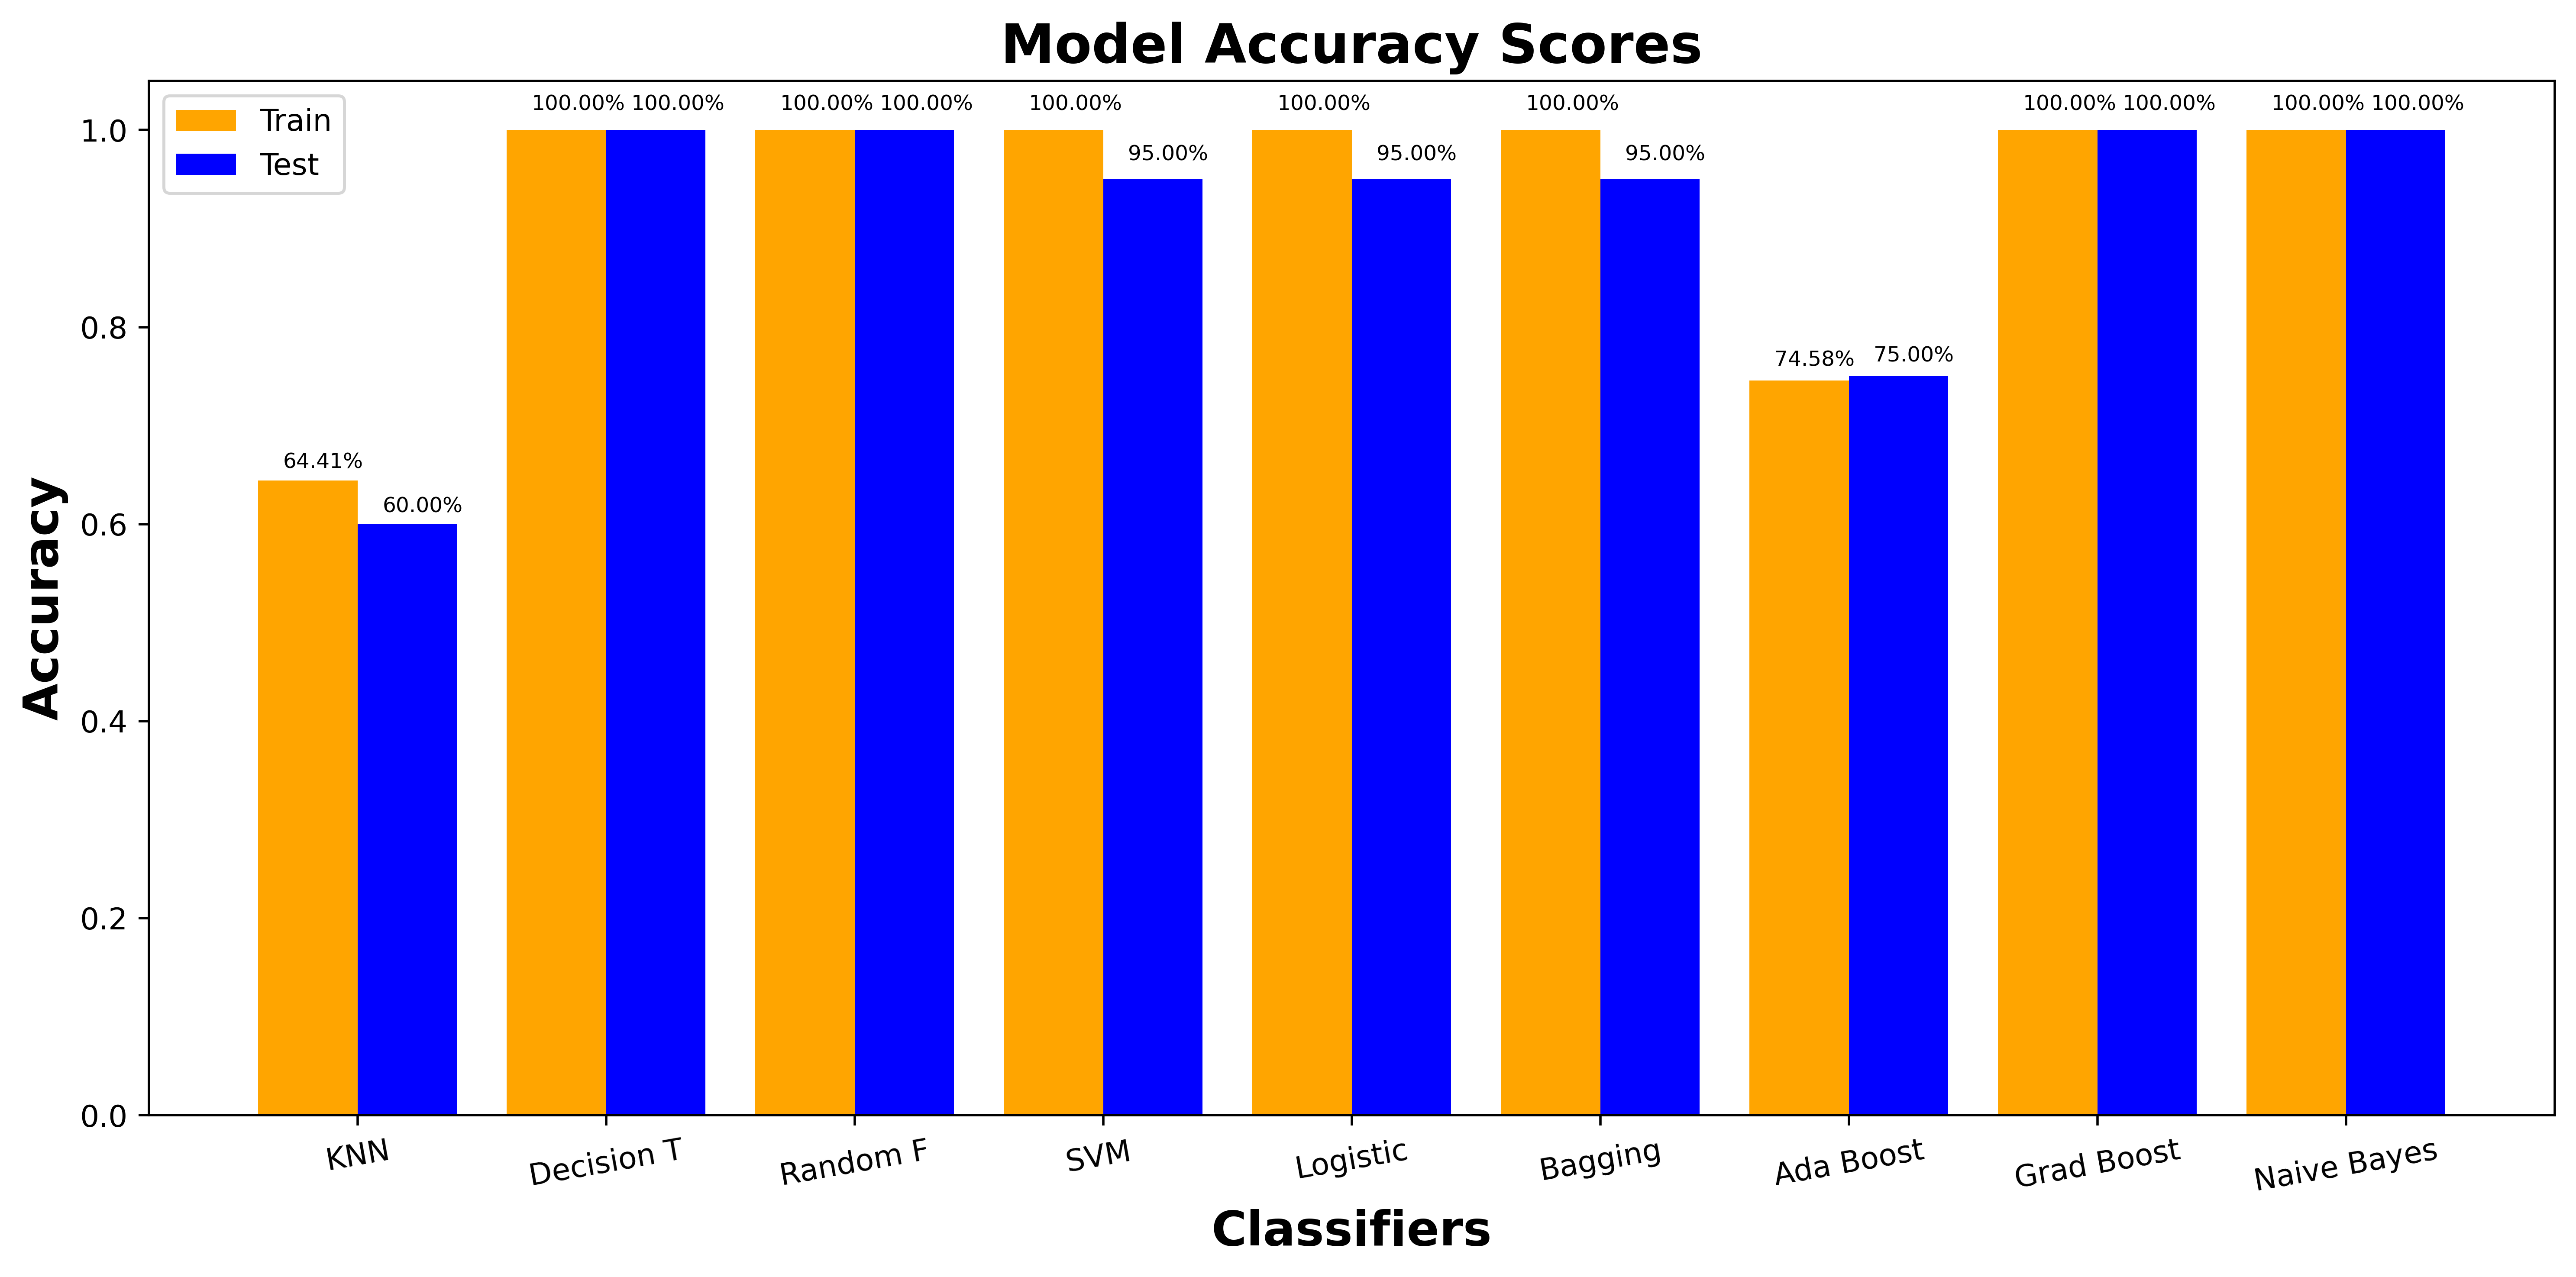

In [93]:
# Setting parameters for font sizes
rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
# Creating a bar chart
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
# Adjusting model names for better readability
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]
# Plotting bars for training and testing accuracies
bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
# Setting x-axis ticks and labels
plt.xticks(x_pos, model_names)

# Adding labels and title
plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

# Adding text labels on top of bars
for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)
    
for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

# Updating font parameters
pylab.rcParams.update(rcParams)
# Adjusting layout and displaying the chart
fig.tight_layout()
plt.show()
# Saving the figure
fig.savefig('C:/Users/user/Desktop/Github RAP/Mod_Acc_Bar.png', dpi = 500)

# Pickle files

In [94]:
# Save the trained model to a file using pickle
pickle.dump(model_GradientBoost,open('model_GradientBoost.pkl','wb'))

In [95]:
# Save the TF-IDF vectorizer to a file using pickle
pickle.dump(tfidf_vector,open('tfidf_vector.pkl','wb'))